# VeraCity - News Analyzer and Scorer

In [1]:
!pip install "numpy<2.0"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.



  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Data Exploration ( Unfiltered, Raw data )

In [5]:
# Dataset is stored as a pickle file. Converting that to Pandas DF.

data = pd.read_pickle(r"C:\Users\agrim\OneDrive\Desktop\Semester 5\NLP\FineFake\FineFake.pkl")

In [6]:
# 1. Save the original raw data as a CSV for backup
data.to_csv("FineFake_Original_Backup.csv", index=False)

# 2. Confirm it saved by checking the first few rows
print("Backup CSV saved successfully!")
print(f"Dataset contains {len(data)} rows.")

Backup CSV saved successfully!
Dataset contains 16909 rows.


In [9]:
data.head(5)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN
2,RabiesRabies is a fatal but preventable viral ...,Image/cdc_gov/6.ico,[Q39222],Entertainment,0,1,"[0.034429, -0.098264, 0.168568, -0.169074, 0.0...","[[Q39222, description, deadly viral disease, t...","[[[Q39222, P910, Q7427599], [Q39222, P780, Q10...",cdc_gov,None,NaN,NaN
3,Other Wild AnimalsTerrestrial Carnivores: Racc...,Image/cdc_gov/12.ico,"[Q121439, Q43604020, Q39222, Q698976, Q1361206...",Entertainment,0,1,"[0.013125, -0.046556402, 0.0849138, -0.0067817...","[[Q121439, description, species of mammal nati...","[[[Q121439, P105, Q7432], [Q121439, P141, Q211...",cdc_gov,None,NaN,NaN
4,Coronavirus Disease 2019 (COVID-19)UPDATE\n\nT...,Image/cdc_gov/13.jpeg,[],Entertainment,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN


In [10]:
data.shape

(16909, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16909 entries, 0 to 16908
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 16909 non-null  object
 1   image_path           16909 non-null  object
 2   entity_id            16909 non-null  object
 3   topic                16909 non-null  object
 4   fine-grained label   16909 non-null  int64 
 5   label                16909 non-null  int64 
 6   knowledge_embedding  16909 non-null  object
 7   description          16909 non-null  object
 8   relation             16909 non-null  object
 9   platform             16909 non-null  object
 10  author               8739 non-null   object
 11  date                 12126 non-null  object
 12  comment              4969 non-null   object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [15]:
for column in data.columns:
    print(column, '\n')

text 

image_path 

entity_id 

topic 

fine-grained label 

label 

knowledge_embedding 

description 

relation 

platform 

author 

date 

comment 



In [17]:
print('Number of unique platforms data was collected from: ', data.platform.nunique())
print('\nThe platforms are: ', [platform for platform in data.platform.unique()])

Number of unique platforms data was collected from:  7

The platforms are:  ['cdc_gov', 'apnews', 'cnn', 'reddit', 'twitter', 'washingtonpost', 'snope']


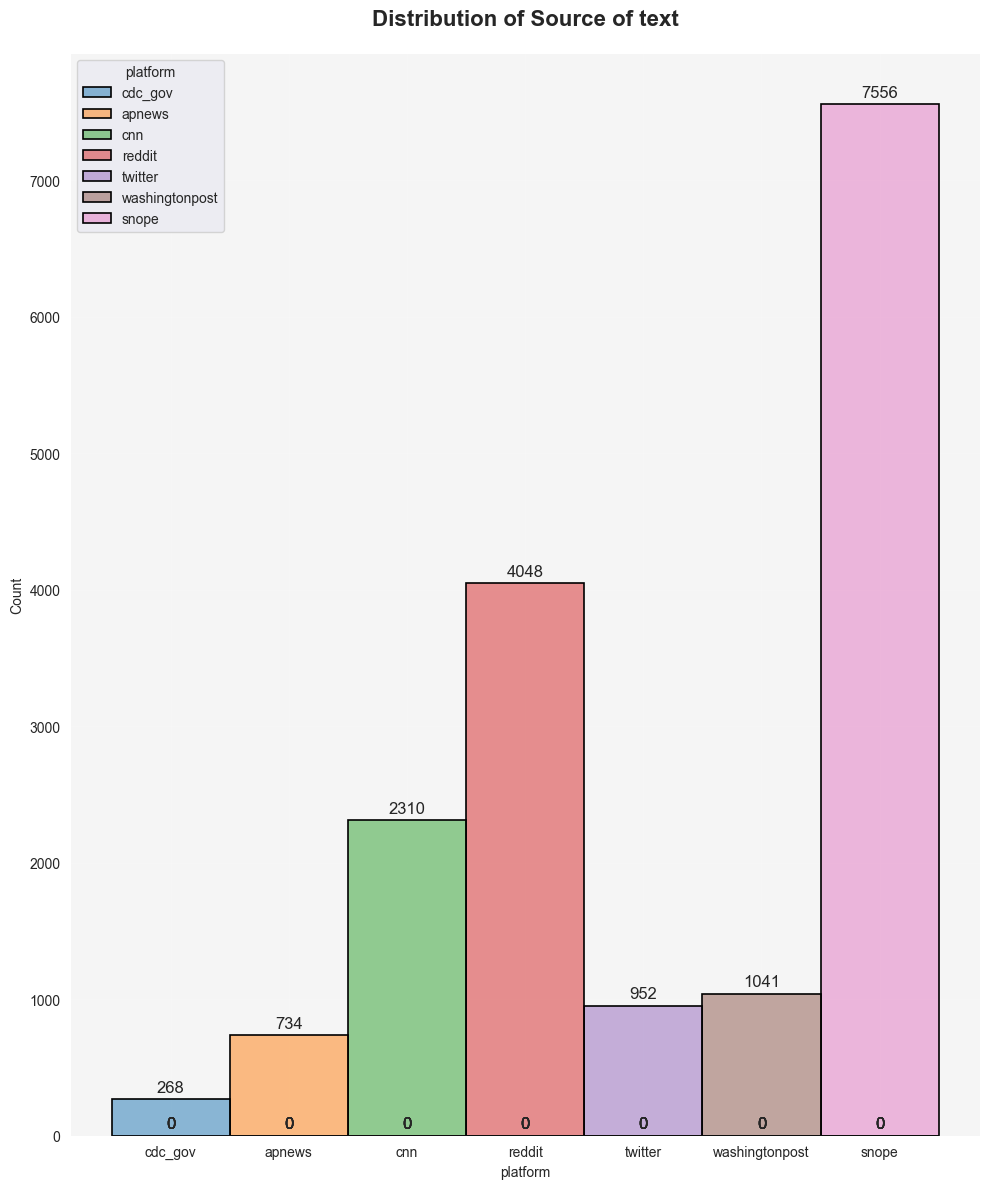

In [19]:
# understanding the distribution of source of the text

sns.set_style('darkgrid')
plt.figure(figsize = (10,12))
ax = sns.histplot(data, x = 'platform', hue = 'platform', palette = 'tab10', edgecolor = 'black', linewidth = 1.2)

ax.set_facecolor('whitesmoke')
ax.grid(True, alpha = 0.2)
plt.title('Distribution of Source of text', pad = 20, fontsize = 16, weight = 'bold')

for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

plt.tight_layout()
plt.show()

- Most text comes from the source 'snope', which is a website that verifies the authenticity of
news reports

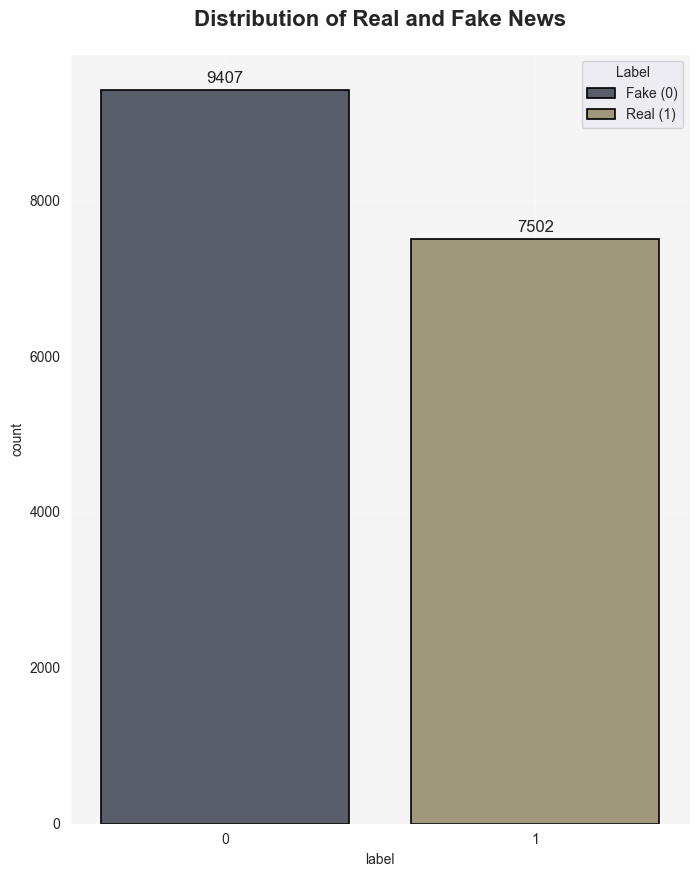

In [21]:
# Plotting Binary Label Distribution

plt.figure(figsize = (8,10))
ax = sns.countplot(data, x = 'label', palette = 'cividis', hue = 'label', edgecolor = 'black', linewidth = 1.2)

ax.set_facecolor('whitesmoke')
ax.grid(True, alpha = 0.3)
ax.legend( title = 'Label', labels = ['Fake (0)', 'Real (1)'])

for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

plt.title('Distribution of Real and Fake News', pad = 20, fontsize = 16, weight = 'bold')
plt.show()

**0 = Fake**

**1 = Real**

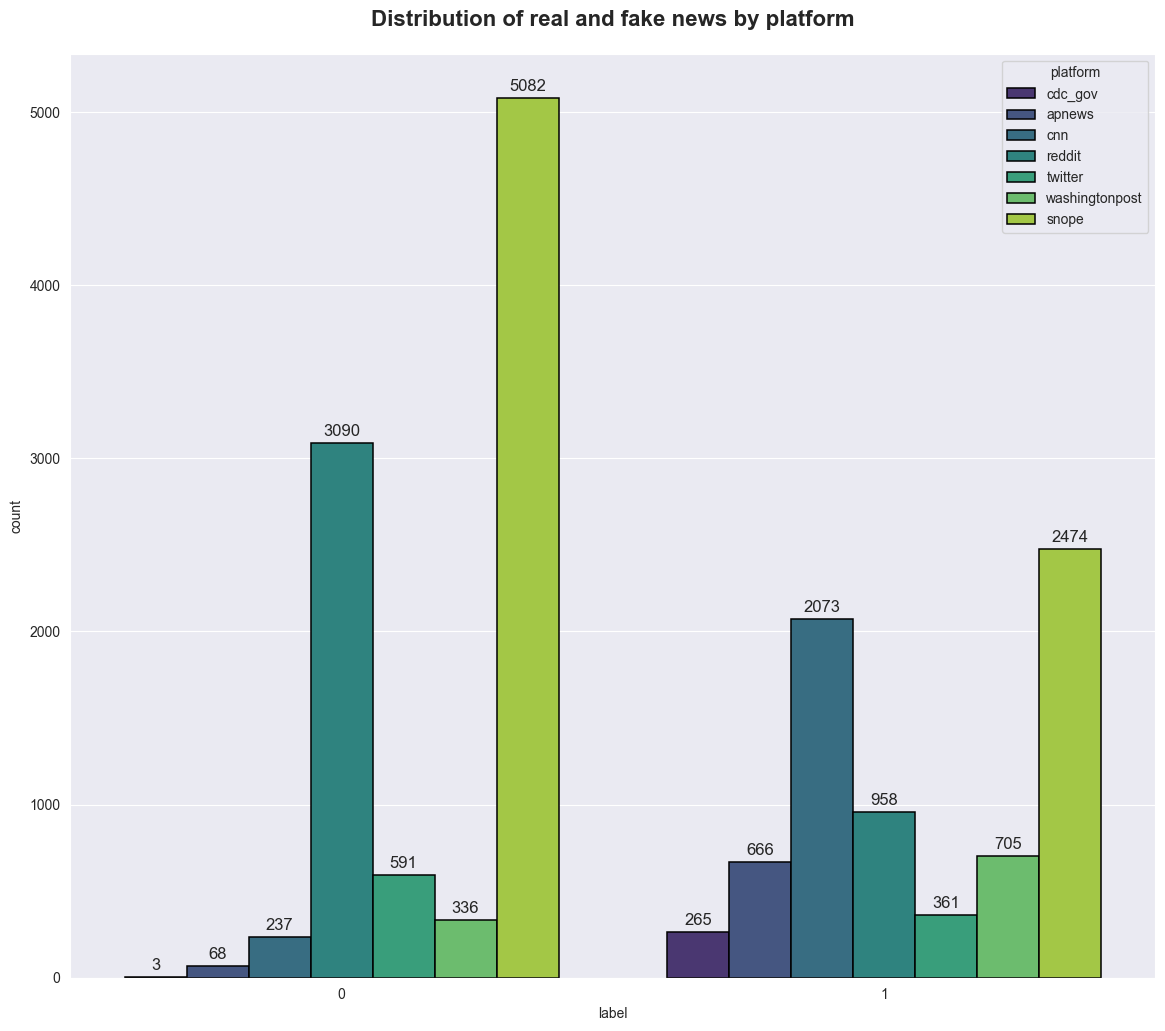

In [23]:
# Distribution of real and fake news by souce (Platform)

sns.set_style('darkgrid')
plt.figure(figsize = (14,12))
ax = sns.countplot(data, x = 'label', hue = 'platform', palette = 'viridis', edgecolor = 'black', linewidth = 1.1)


for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

plt.title('Distribution of real and fake news by platform', pad = 20, fontsize = 16, weight = 'bold')
plt.show()

### **Binary labels and Fine-grained labels mapping**

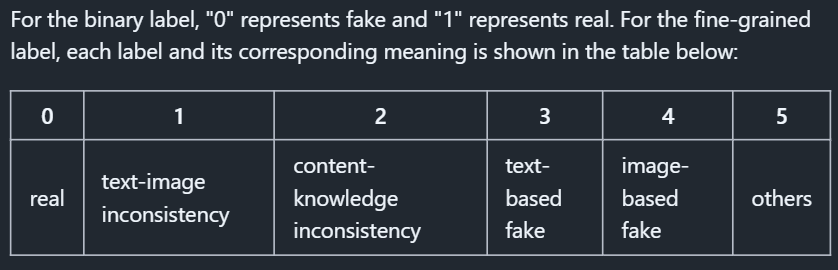

source: https://github.com/Accuser907/FineFake

C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\3249292810.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_map[i] for i in label_map.keys()])


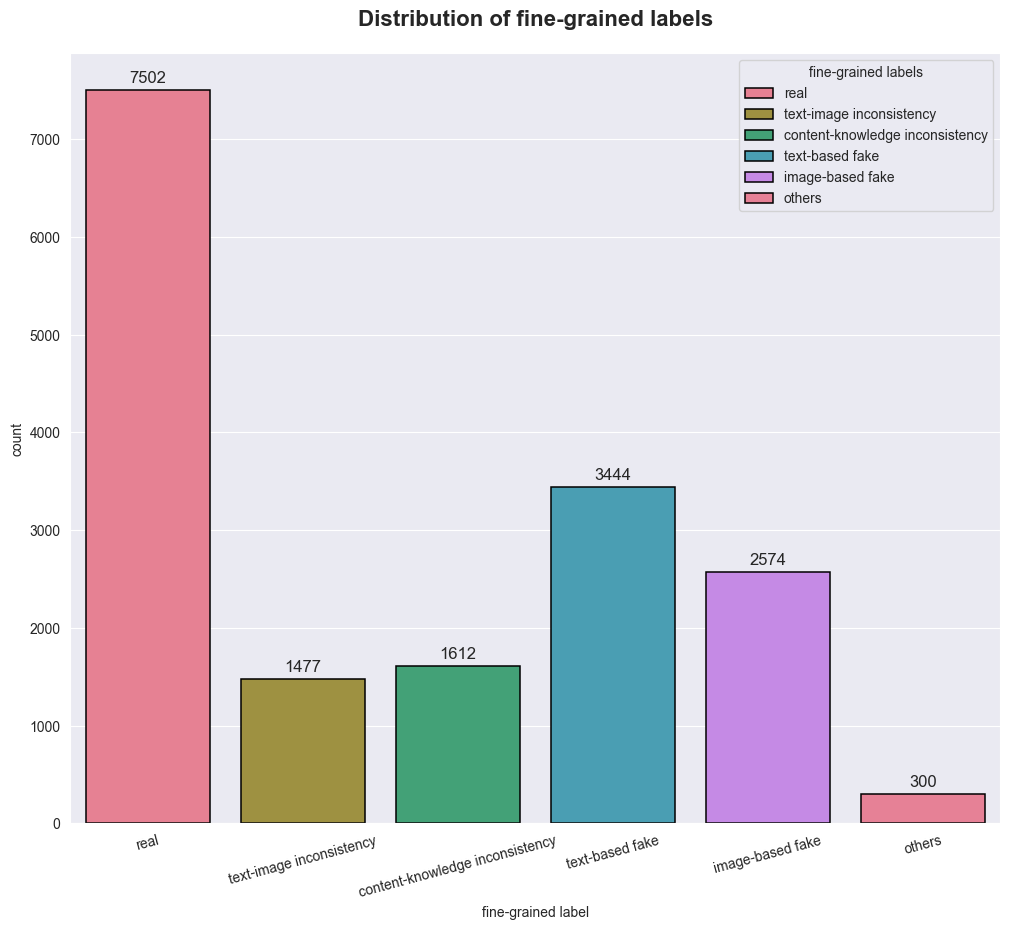

In [27]:
# Distribution of fine-grained label counts

label_map = {
    0: "real",
    1: "text-image inconsistency",
    2: "content-knowledge inconsistency",
    3: "text-based fake",
    4: "image-based fake",
    5: "others"
}


sns.set_style('darkgrid')
plt.figure(figsize = (12, 10))
ax = sns.countplot(data, x = 'fine-grained label', hue = 'fine-grained label', palette = 'husl', order = label_map.keys(), edgecolor = 'black', linewidth = 1.1)
# order = tells Seaborn which categories to plot and in what order.

ax.set_xticklabels([label_map[i] for i in label_map.keys()])
ax.legend(title = 'fine-grained labels', labels = list(label_map.values()))

for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

plt.title('Distribution of fine-grained labels', pad = 20, fontsize = 16, weight = 'bold')
plt.xticks(rotation = 15)
plt.show()

**NOTE: No Images (image data) provided in this dataset is used for this project.**

## Version A: EDA cleaning (Used for text length stats)

In [33]:
import re
from bs4 import BeautifulSoup


# --- 1. COUNTING FUNCTIONS (For understannding how many rows have URLs, HTML tags, extra whitespaces, or emojis in the dataset) ---

def count_html_tags(text):
    """Counts the number of rows in the data DF that have at least one HTML tags."""
    
    # Matches any string starting with '<' and ending with '>', optionally containing content; lazy (non-greedy) match
    return text.str.contains(r'<.*?>', na = False, regex = True).sum()

def count_urls(text):
    """Counts the number of rows in the data DF that have one of these common URL patterns."""
    
    # Matches http / https or www. links in the text
    url_pattern = r'https?://\S+|www\.\S+|\S+\.\S+/\S+'
    return text.str.contains(url_pattern, na = False, regex = True).sum()

def count_emojis(text):
    """
    Counts the number of rows containing common emojis or non-standard characters.
    Returns number of rows with at least one emoji.
    """
    
    # Matches common Unicode emoji blocks and some non-ASCII characters
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F900-\U0001F9FF'  # supplemental symbols and pictographs
        ']+', 
        flags = re.UNICODE
    )
    return text.apply(lambda x: bool(emoji_pattern.search(str(x))) if pd.notna(x) else False).sum()
    # each row of the DF (each text) is treated as x here; returns Series of True / False, True = 1, False = 0; summed up

def count_extra_whitespace(text):
    """
    Normalizing whitespaces
    Counts the number of rows containing more than one space in a row.
    """
    
    return text.str.contains(r'\s{2,}', na = False, regex = True).sum()




# --- 2. CLEANING FUNCTION ---

def clean_text_for_length(text):
    """
    Applies basic cleaning steps (HTML, URLs, Emojis, Whitespace) to the text column; which is treated as a Series here.
    Light cleaning for exploratory analysis and getting text length statistics.
    Does NOT perform any normalization of text like lemmatization, stopword removal, lowercase, remove punctuations.
    """

    # 1. Remove HTML tags - using the BeautifulSoup library and its built in HTML parsing engine
    
    def remove_html_tags(text):
        if pd.isna(text) or text is None:
            return text
         
        cleaned_html = BeautifulSoup(text, 'html.parser').get_text()

        # Fixes the merged words (e.g., "AnimalsTerrestrial" -> "Animals Terrestrial")
        cleaned_html = re.sub(r'([a-z])([A-Z])', r'\1 \2', cleaned_html)

        return cleaned_html
    
    # 2. Remove URLs - Using same regex pattern as in the count_url function above.
    url_pattern = r'https?://\S+|www\.\S+|\S+\.\S+/\S+'

    # 3. Remove Emojis / symbols
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F900-\U0001F9FF'  # supplemental symbols and pictographs
        ']+', 
        flags = re.UNICODE
    )

    # Applying cleaning sequentially
    cleaned_text = text.astype(str).apply(remove_html_tags)
    
    cleaned_text = cleaned_text.str.replace(url_pattern, ' ', regex = True)
    
    cleaned_text = cleaned_text.str.replace(emoji_pattern, ' ', regex = True)

    # 4. Normalize Whitespace
    cleaned_text = cleaned_text.str.strip()
    cleaned_text = cleaned_text.str.replace(r'\s+', ' ', regex=True)

    return cleaned_text


In [35]:
data_copy = data.copy(deep = True)

In [37]:
data_copy.head(2)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN


In [38]:
raw_text = data_copy['text']

print("HTML rows:", count_html_tags(raw_text))
print("URL rows:", count_urls(raw_text))
print("Emoji rows:", count_emojis(raw_text))
print("Extra whitespace rows:", count_extra_whitespace(raw_text))

HTML rows: 13
URL rows: 1384
Emoji rows: 157
Extra whitespace rows: 5070


In [40]:
data_copy['clean_text'] = clean_text_for_length(data_copy['text'])

C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\1005619495.py:66: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_html = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\1005619495.py:66: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  cleaned_html = BeautifulSoup(text, 'html.parser').get_text()


In [42]:
data_copy.head(3)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta..."
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo..."
2,RabiesRabies is a fatal but preventable viral ...,Image/cdc_gov/6.ico,[Q39222],Entertainment,0,1,"[0.034429, -0.098264, 0.168568, -0.169074, 0.0...","[[Q39222, description, deadly viral disease, t...","[[[Q39222, P910, Q7427599], [Q39222, P780, Q10...",cdc_gov,None,NaN,NaN,Rabies Rabies is a fatal but preventable viral...


In [43]:
data_copy['text'].head(10)

0    CDCs Abortion Surveillance System FAQsNo, stat...
1    Abortion Surveillance — United States, 2012Abo...
2    RabiesRabies is a fatal but preventable viral ...
3    Other Wild AnimalsTerrestrial Carnivores: Racc...
4    Coronavirus Disease 2019 (COVID-19)UPDATE\n\nT...
5    Venomous Snake Bites: Symptoms & First AidFirs...
6    About Zika Virus DiseaseWhat You Need to Know\...
7    General InformationTriatomine Bug FAQs\n\nWhat...
8    People at Risk – Pregnant Women and NewbornsCD...
9    Use and Care of MasksConsiderations for specif...
Name: text, dtype: object

In [44]:
data_copy['clean_text'].head(10)

0    CDCs Abortion Surveillance System FAQs No, sta...
1    Abortion Surveillance — United States, 2012Abo...
2    Rabies Rabies is a fatal but preventable viral...
3    Other Wild Animals Terrestrial Carnivores: Rac...
4    Coronavirus Disease 2019 (COVID-19)UPDATE The ...
5    Venomous Snake Bites: Symptoms & First Aid Fir...
6    About Zika Virus Disease What You Need to Know...
7    General Information Triatomine Bug FAQs What i...
8    People at Risk – Pregnant Women and Newborns C...
9    Use and Care of Masks Considerations for speci...
Name: clean_text, dtype: object

In [49]:
data_copy[['text', 'clean_text']].head(10)

,text,clean_text
0,"CDCs Abortion Surveillance System FAQsNo, stat...","CDCs Abortion Surveillance System FAQs No, sta..."
1,"Abortion Surveillance — United States, 2012Abo...","Abortion Surveillance — United States, 2012Abo..."
2,RabiesRabies is a fatal but preventable viral ...,Rabies Rabies is a fatal but preventable viral...
3,Other Wild AnimalsTerrestrial Carnivores: Racc...,Other Wild Animals Terrestrial Carnivores: Rac...
4,Coronavirus Disease 2019 (COVID-19)UPDATE\n\nT...,Coronavirus Disease 2019 (COVID-19)UPDATE The ...
5,Venomous Snake Bites: Symptoms & First AidFirs...,Venomous Snake Bites: Symptoms & First Aid Fir...
6,About Zika Virus DiseaseWhat You Need to Know\...,About Zika Virus Disease What You Need to Know...
7,General InformationTriatomine Bug FAQs\n\nWhat...,General Information Triatomine Bug FAQs What i...
8,People at Risk – Pregnant Women and NewbornsCD...,People at Risk – Pregnant Women and Newborns C...
9,Use and Care of MasksConsiderations for specif...,Use and Care of Masks Considerations for speci...


## Computing Word count / text length

In [52]:
data_copy['word_count'] = data_copy['clean_text'].apply( lambda x: len(x.split()))
data_copy.head(3)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta...",59
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo...",16339
2,RabiesRabies is a fatal but preventable viral ...,Image/cdc_gov/6.ico,[Q39222],Entertainment,0,1,"[0.034429, -0.098264, 0.168568, -0.169074, 0.0...","[[Q39222, description, deadly viral disease, t...","[[[Q39222, P910, Q7427599], [Q39222, P780, Q10...",cdc_gov,None,NaN,NaN,Rabies Rabies is a fatal but preventable viral...,122


In [53]:
data_copy['word_count'].head(10)

0       59
1    16339
2      122
3      345
4       56
5      174
6       18
7     1159
8       57
9      530
Name: word_count, dtype: int64

In [54]:
data_copy['word_count'].describe()

count    16909.000000
mean       222.775918
std        713.009820
min          1.000000
25%         12.000000
50%         20.000000
75%         55.000000
max      18330.000000
Name: word_count, dtype: float64

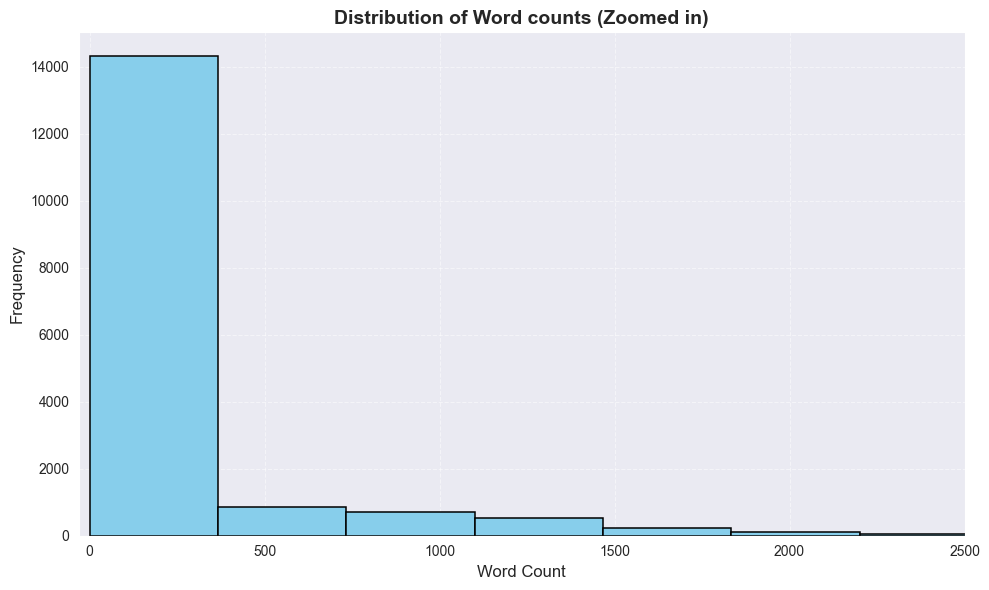

In [58]:
plt.figure(figsize = (10,6))
data_copy['word_count'].hist(bins = 50, color = 'skyblue', edgecolor = 'black', linewidth = 1.1)
plt.xlim(-30, 2500)

plt.title('Distribution of Word counts (Zoomed in)', fontsize = 14, weight = 'bold')
plt.xlabel('Word Count', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

## Filtering by Word Length 

In [61]:
data_copy_filtered = data_copy[data_copy['word_count'] >= 10]
len(data_copy_filtered)

13862

In [63]:
data_copy_filtered['platform'].value_counts()

platform
snope             7154
cnn               2307
reddit            1535
washingtonpost    1039
twitter            825
apnews             734
cdc_gov            268
Name: count, dtype: int64

In [65]:
usable_data = data_copy_filtered.copy(deep = True)
print(len(usable_data))
usable_data['platform'].value_counts()

13862


platform
snope             7154
cnn               2307
reddit            1535
washingtonpost    1039
twitter            825
apnews             734
cdc_gov            268
Name: count, dtype: int64

## EDA on Filtered dataset

In [68]:
usable_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13862 entries, 0 to 16908
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 13862 non-null  object
 1   image_path           13862 non-null  object
 2   entity_id            13862 non-null  object
 3   topic                13862 non-null  object
 4   fine-grained label   13862 non-null  int64 
 5   label                13862 non-null  int64 
 6   knowledge_embedding  13862 non-null  object
 7   description          13862 non-null  object
 8   relation             13862 non-null  object
 9   platform             13862 non-null  object
 10  author               6117 non-null   object
 11  date                 9280 non-null   object
 12  comment              2344 non-null   object
 13  clean_text           13862 non-null  object
 14  word_count           13862 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 1.7+ MB


In [70]:
usable_data['platform'].unique()

array(['cdc_gov', 'apnews', 'cnn', 'reddit', 'twitter', 'washingtonpost',
       'snope'], dtype=object)

In [72]:
usable_data['fine-grained label'].unique()

# All fine-grained labels are still present in filtered dataset

array([0, 2, 3, 1, 4, 5], dtype=int64)

In [74]:
usable_data['topic'].unique()

# Instances from all six distinct topics (i.e., politics, entertainment, business, health, society and conflict) are still present in the filtered dataset

array(['Health', 'Entertainment', 'Conflict', 'Politics', 'Society',
       'Business', 'Uncategorized'], dtype=object)

In [76]:
usable_data.word_count.describe()

count    13862.000000
mean       270.352907
std        779.471218
min         10.000000
25%         16.000000
50%         24.000000
75%        201.000000
max      18330.000000
Name: word_count, dtype: float64

### Checking for class imbalance on filtered dataset

**NOTE** 

The dataset was filtered based on the following condition:

1. word_count >= 10 ; each text had at least 10 words

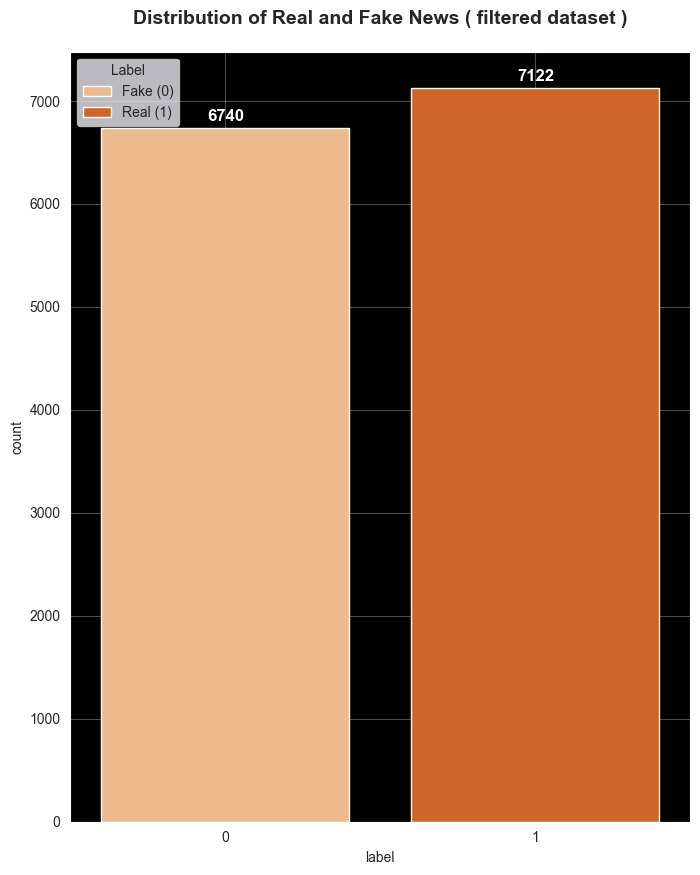

In [80]:
# Binary Label Distribution
# 0 = Fake
# 1 = Real

plt.figure(figsize = (8,10))
ax = sns.countplot(data = usable_data, x = 'label', palette = 'Oranges', hue = 'label')
ax.grid(True, alpha = 0.3)
ax.set_facecolor('black')

for container in ax.containers:
    ax.bar_label(container, color = 'white', fontsize = 12, fontweight = 'bold', padding = 3)

plt.legend(title = 'Label', labels = ['Fake (0)', 'Real (1)'])
plt.title('Distribution of Real and Fake News ( filtered dataset )', pad = 20, fontsize = 14, weight = 'bold')
plt.show()

**NOTE**

- There is neglible class imbalance.

### Checking Distribution of fine-grained labels on filtered dataset

C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\1260691356.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_map[i] for i in label_map.keys()])


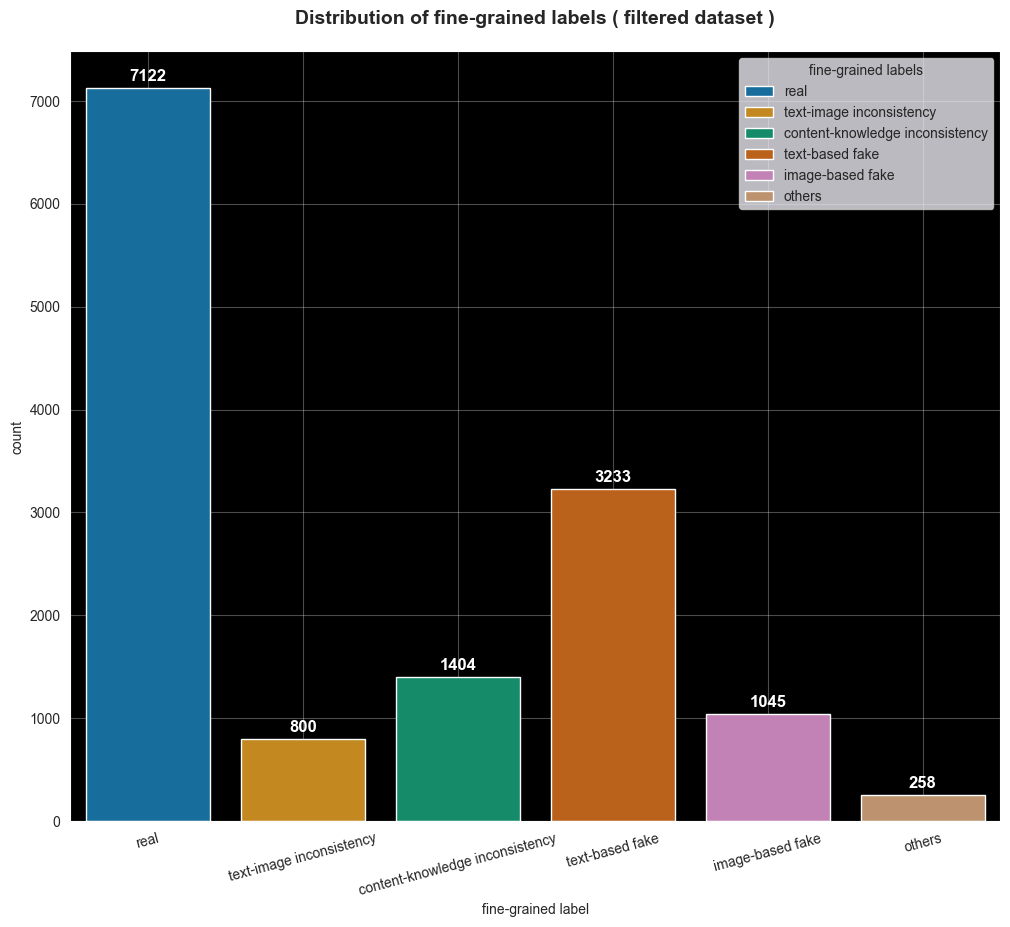

In [84]:
# Distribution of fine-grained label counts

label_map = {
    0: "real",
    1: "text-image inconsistency",
    2: "content-knowledge inconsistency",
    3: "text-based fake",
    4: "image-based fake",
    5: "others"
}


plt.figure(figsize = (12, 10))
ax = sns.countplot(usable_data, x = 'fine-grained label', hue = 'fine-grained label', palette = 'colorblind', order = label_map.keys())
# order = tells Seaborn which categories to plot and in what order.
ax.grid(True, alpha = 0.3)
ax.set_facecolor('black')


ax.set_xticklabels([label_map[i] for i in label_map.keys()])
ax.legend(title = 'fine-grained labels', labels = list(label_map.values()))

for container in ax.containers:
    ax.bar_label(container, color = 'white', fontsize = 12, fontweight = 'bold', padding = 3)

plt.title('Distribution of fine-grained labels ( filtered dataset )', pad = 20, fontsize = 14, weight = 'bold')
plt.xticks(rotation = 15)
plt.show()

### Word Count on filtered Dataset

In [87]:
usable_data.head(2)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta...",59
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo...",16339


In [88]:
usable_data['word_count'] = usable_data['clean_text'].apply( lambda x: len(x.split()))
usable_data.head(2)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta...",59
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo...",16339


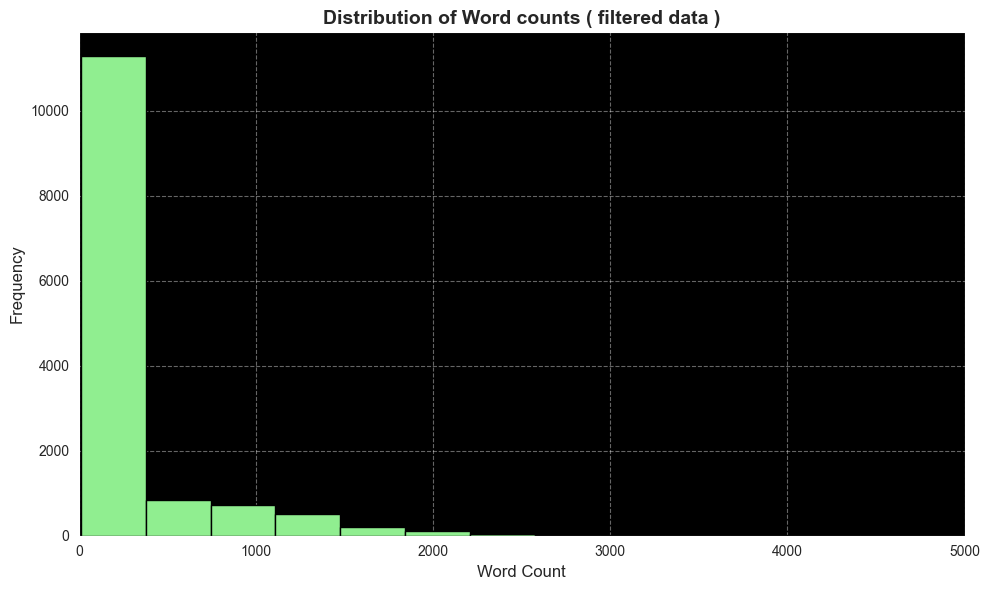

In [91]:
plt.figure(figsize = (10,6))
ax = usable_data['word_count'].hist(bins = 50, color = 'lightgreen', edgecolor = 'black')
ax.set_xlim(0, 5000)
ax.set_facecolor('black')

plt.title('Distribution of Word counts ( filtered data )', fontsize = 14, weight = 'bold')
plt.xlabel('Word Count', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.grid(True, linestyle = '--', alpha = 0.4)

plt.tight_layout()
plt.show()

## Feature Engineering: Sentiment and Bias Metrics

What the following code does:

- Bias (Subjectivity): Measures how much of the text is "opinion" vs. "fact."

- Intensity (Polarity): Measures the "emotional volume" (how strong the sentiment is). It quantifies how much emotion is in the text.

- Bias and Intensity MUST be quantified using the raw text, not the cleaned_text column, since punctuation and capitalization help to understand the author's intent and influence the above scores.

In [95]:
!pip install textblob

In [97]:
from textblob import TextBlob

In [99]:
def get_bias(text):
    """
    INPUT: text (row-wise) from usable_data DF
    OUTPUT: bias of text
    """
    text = str(text)
    text = TextBlob(text)
    bias = text.sentiment.subjectivity
    return bias

def get_intensity(text):
    """
    INPUT: text (row-wise) from usable_data DF
    OUTPUT: polarity of text (how negative or positive the tone is)
    """
    text = str(text)
    text = TextBlob(text)
    polarity = text.sentiment.polarity
    return abs(polarity)            
    # we take the absolute value because extremely positive (1.0) and extremely negative (-1.0) both are high intensity


usable_data['bias_score'] = usable_data['text'].apply(get_bias)
usable_data['intensity_score'] = usable_data['text'].apply(get_intensity)

In [101]:
usable_data[['text', 'bias_score', 'intensity_score']].iloc[1000:1004]

,text,bias_score,intensity_score
1001,Slacktivism is over. The #NeverAgain movement ...,0.428370,0.111311
1002,These are the victims of the Florida school sh...,0.518495,0.232126
1003,Sandy Hook shooting victims rememberedCNN —\n\...,0.578598,0.268849
1004,Melania Trump hires Cristina Niceta Lloyd Whit...,0.241698,0.096421


In [103]:
# Finding average bias in fake and real news

print("Average Bias for Fake News:", usable_data[usable_data['label'] == 0]['bias_score'].mean())
print("Average Bias for Real News:", usable_data[usable_data['label'] == 1]['bias_score'].mean())

Average Bias for Fake News: 0.2834674235842833
Average Bias for Real News: 0.3500794597893634


In [105]:
# Finding average intensity in fake and real news

print("Average Intensity for Fake News:", usable_data[usable_data['label'] == 0]['intensity_score'].mean())
print("Average Intensity for Real News:", usable_data[usable_data['label'] == 1]['intensity_score'].mean())

Average Intensity for Fake News: 0.12110684837276647
Average Intensity for Real News: 0.10542758335758183


In [107]:
# 2. Capture the "Knowledge" of what Real News looks like 
# (Label 1 = Real News); Filter to real samples

real_data = usable_data[usable_data['label'] == 1]

# Select the two columns
real_scores = real_data[['bias_score', 'intensity_score']]

# Aggregate
real_mean = real_scores.mean()
real_std = real_scores.std()

real_stats = pd.DataFrame([real_mean, real_std], index=['mean', 'std'])


MEAN_BIAS = real_stats.loc['mean', 'bias_score']
STD_BIAS = real_stats.loc['std', 'bias_score']
MEAN_INTENSITY = real_stats.loc['mean', 'intensity_score']
STD_INTENSITY = real_stats.loc['std', 'intensity_score']


print("--- Baselines Captured using usable_data DF for REAL (1) ---\n")
print(f"Bias: Mean = {MEAN_BIAS:.3f},\t Std = {STD_BIAS:.3f}")
print(f"Intensity: Mean = {MEAN_INTENSITY:.3f},\t Std = {STD_INTENSITY:.3f}")

# This tells us the "Normal Range"

print(f"\nNormal Bias Range for REAL NEWS (1):\t {MEAN_BIAS - STD_BIAS:.3f} to {MEAN_BIAS + STD_BIAS:.3f}")
print(f"Normal Intensity Range for REAL NEWS (1):\t {MEAN_INTENSITY - STD_INTENSITY:.3f} to {MEAN_INTENSITY + STD_INTENSITY:.3f}")

--- Baselines Captured using usable_data DF for REAL (1) ---

Bias: Mean = 0.350,	 Std = 0.218
Intensity: Mean = 0.105,	 Std = 0.135

Normal Bias Range for REAL NEWS (1):	 0.132 to 0.568
Normal Intensity Range for REAL NEWS (1):	 -0.030 to 0.240


<hr>

## Platform x Label Interaction ( checking for data leakage ) 

In [111]:
# Creating a DataFrame demonstrating the relationship between platforms and labels (0 = Fake, 1 = Real)

platform_label_counts = usable_data.groupby(['platform', 'label']).size().unstack(fill_value = 0)
platform_label_counts.head(10)

label,0,1
platform,,
apnews,68,666
cdc_gov,3,265
cnn,237,2070
reddit,801,734
snope,4800,2354
twitter,497,328
washingtonpost,334,705


<Figure size 1000x1000 with 0 Axes>

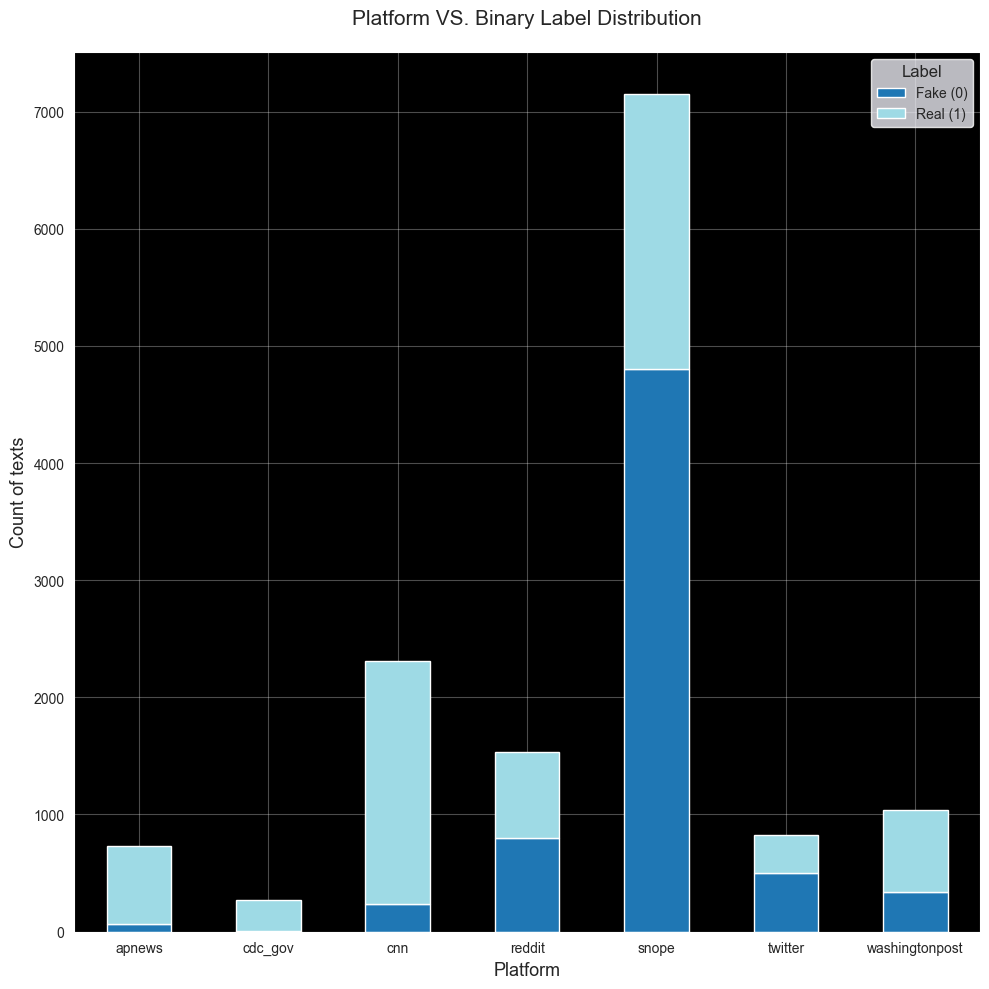

In [113]:
# PLotting a stacked bar chart to show above relationship
# Each bar = A single platform
# Each color = Fake vs Real

plt.figure(figsize=(10, 10), facecolor='black')
ax = platform_label_counts.plot( kind = 'bar', stacked = True, figsize = (10,10), colormap = 'tab20' )

ax.set_facecolor('black')
ax.grid(True, alpha = 0.3)

plt.xlabel('Platform', fontsize = 13)
plt.ylabel('Count of texts', fontsize = 13)
plt.title('Platform VS. Binary Label Distribution', pad = 20, fontsize = 15)

plt.xticks(rotation = 0)
plt.legend(title = 'Label', labels = ['Fake (0)', 'Real (1)'], title_fontsize = 12, edgecolor = 'white')

plt.tight_layout()
plt.show()

<hr>

<hr>

## NLP Pipeline


**NLP PREROCESSING STEPS**
- lowercasing
- tokenization
- Removing Punctuation
- stopword removal
- lemmatization
- N-grams (bigrams are used)
  

What was NOT done: 

- Numbers are kept, sincec numbers are often significant in news articles.
- No stemming was done.

In [119]:
!pip install spacy

  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.1 which is incompatible.
numba 0.63.1 requires numpy<2.4,>=1.22, but you have numpy 2.4.1 which is incompatible.


In [121]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     --------------------------------------- 0.1/12.8 MB 939.4 kB/s eta 0:00:14
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.2/12.8 MB 351.5 kB/s eta 0:00:36
      -------------------------------------- 0.2/12.8 MB 327.7 kB/s eta 0:00:39
      -------------------------------------- 0.2/12.8 MB 

In [123]:
df_nlp = usable_data.copy(deep = True)
df_nlp.head(3)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count,bias_score,intensity_score
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta...",59,0.400000,0.400000
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo...",16339,0.409654,0.046032
2,RabiesRabies is a fatal but preventable viral ...,Image/cdc_gov/6.ico,[Q39222],Entertainment,0,1,"[0.034429, -0.098264, 0.168568, -0.169074, 0.0...","[[Q39222, description, deadly viral disease, t...","[[[Q39222, P910, Q7427599], [Q39222, P780, Q10...",cdc_gov,None,NaN,NaN,Rabies Rabies is a fatal but preventable viral...,122,0.502083,0.164583


In [125]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13862 entries, 0 to 16908
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 13862 non-null  object 
 1   image_path           13862 non-null  object 
 2   entity_id            13862 non-null  object 
 3   topic                13862 non-null  object 
 4   fine-grained label   13862 non-null  int64  
 5   label                13862 non-null  int64  
 6   knowledge_embedding  13862 non-null  object 
 7   description          13862 non-null  object 
 8   relation             13862 non-null  object 
 9   platform             13862 non-null  object 
 10  author               6117 non-null   object 
 11  date                 9280 non-null   object 
 12  comment              2344 non-null   object 
 13  clean_text           13862 non-null  object 
 14  word_count           13862 non-null  int64  
 15  bias_score           13862 non-null  floa

In [127]:
df_nlp.to_csv("cleaned_data.csv", index = False)
print('Done')

Done


In [129]:
import spacy

In [131]:
nlp = spacy.load('en_core_web_sm')    # load a pre-trained english pipeline and store it as an object referred by nlp


def nlp_pipeline_optimized(texts_series):
    """
    INPUT: pandas series; clean_text
    
    Purpose of this function:
    - Lowercases everything
    - Tokenizes (split words)
    - Lemmatizes (finding word roots)
    - Removes Stopwords (common, but not useful words: the, is, at)
    - Removes Punctuation (but KEEPS numbers; numbers are often significant in news texts)

    OUTPUT: list of cleaned strings
    """

    processed_texts = []

    # Adding a limit of 5000 words.
    texts_to_process = texts_series.astype(str).apply(lambda x: " ".join(x.split()[:5000])).str.lower()

    # nlp.pipe takes an ITERABLE (the whole column)
    # batch_size = 100 means it processes 100 articles (100 rows) at a time in memory
    
    docs = nlp.pipe(texts_to_process, batch_size = 100)                                # Creates a doc generator; use nlp.pipe for batch processing, optimization, and to speed up
                                                                                       # nlp.pipe() can take a pandas Series as input because a Series is an iterable of strings

    
    for doc in docs:                                                                 # Creating the doc object from generator for each row at a time(this tokenizes the text and stores the tokens)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        
        # newlines and tabs are treated as spaces, so we must explicitly use 'not token.is_space' eventhough spacy does not generally consider spaces as separaate tokens.
        # Extracts root of the word (the lemma) IF it's not a stopword or punctuation or a white space
        
        processed_texts.append(" ".join(tokens))
        
    return processed_texts

# NOTE: a doc object is created for every row separately still, but now 100 rows are processed batch-wise.
# so saying 'for doc in docs' still gives us one article at a time.


# Running the pipeline on df_nlp (the latest, filtered version of dataset)

df_nlp['nlp_text'] = nlp_pipeline_optimized(df_nlp['clean_text'])

# Viewing the new results of the pipeline
df_nlp[['clean_text', 'nlp_text']].head(10)

,clean_text,nlp_text
0,"CDCs Abortion Surveillance System FAQs No, sta...",cdcs abortion surveillance system faqs state a...
1,"Abortion Surveillance — United States, 2012Abo...",abortion surveillance united states 2012aborti...
2,Rabies Rabies is a fatal but preventable viral...,rabies rabie fatal preventable viral disease s...
3,Other Wild Animals Terrestrial Carnivores: Rac...,wild animal terrestrial carnivore raccoon skun...
4,Coronavirus Disease 2019 (COVID-19)UPDATE The ...,coronavirus disease 2019 covid-19)update white...
5,Venomous Snake Bites: Symptoms & First Aid Fir...,venomous snake bite symptom aid aid worker ste...
6,About Zika Virus Disease What You Need to Know...,zika virus disease need know 5 thing need know...
7,General Information Triatomine Bug FAQs What i...,general information triatomine bug faqs triato...
8,People at Risk – Pregnant Women and Newborns C...,people risk pregnant woman newborn cdc estimat...
9,Use and Care of Masks Considerations for speci...,use care mask consideration specific group peo...


In [133]:
# to confirm lemmatization happened
print(df_nlp[['clean_text', 'nlp_text']].iloc[10:15])

                                           clean_text  \
10  Zika Virus For Travelers Since 2018, no local ...   
11  Current Cigarette Smoking Among Adults in the ...   
12  Health Department Directories States & Territo...   
13  When and How to Wash Your Hands Handwashing is...   
14  Selected Adverse Events Reported after COVID-1...   

                                             nlp_text  
10  zika virus traveler 2018 local mosquito borne ...  
11  current cigarette smoking adult united states ...  
12  health department directories states territory...  
13  wash hand handwash good way protect family get...  
14  select adverse event report covid-19 vaccinati...  


In [135]:
df_nlp.tail(3)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count,bias_score,intensity_score,nlp_text
16905,\n@SixthFormPoet's viral Twitter story about m...,Image/snope/25834.jpeg,[Q918],Conflict,2,0,"[0.179374, -0.019174, -0.027632, -0.038922, 0....","[[Q918, description, American social networkin...","[[[Q918, P277, Q2005], [Q918, P277, Q161053], ...",snope,NaN,"Published Jun 17, 2019",NaN,@Sixth Form Poet's viral Twitter story about m...,19,0.633333,0.400000,@sixth form poet viral twitter story meet wife...
16907,\nFDNY Firefighter Michael O'Connell asked the...,Image/snope/25837.jpeg,"[Q283207, Q107711, Q7075]",Conflict,0,1,"[-0.030675, -0.13030434, 0.006415332, 0.031290...","[[Q283207, description, fire department in New...","[[[Q283207, P910, Q8674812], [Q283207, P31, Q6...",snope,NaN,"Published Apr 12, 2019",NaN,FDNY Firefighter Michael O'Connell asked the i...,24,0.000000,0.000000,fdny firefighter michael o'connell ask interne...
16908,\nTwo dozen children went home from St. Jude's...,Image/snope/25839.jpeg,[],Conflict,2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],snope,NaN,"Published Jan 29, 2019",NaN,Two dozen children went home from St. Jude's h...,14,0.214286,0.071429,dozen child go home st jude hospital cancer fr...


In [137]:
usable_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13862 entries, 0 to 16908
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 13862 non-null  object 
 1   image_path           13862 non-null  object 
 2   entity_id            13862 non-null  object 
 3   topic                13862 non-null  object 
 4   fine-grained label   13862 non-null  int64  
 5   label                13862 non-null  int64  
 6   knowledge_embedding  13862 non-null  object 
 7   description          13862 non-null  object 
 8   relation             13862 non-null  object 
 9   platform             13862 non-null  object 
 10  author               6117 non-null   object 
 11  date                 9280 non-null   object 
 12  comment              2344 non-null   object 
 13  clean_text           13862 non-null  object 
 14  word_count           13862 non-null  int64  
 15  bias_score           13862 non-null  floa

In [139]:
df_nlp[['clean_text', 'nlp_text']].head(20)

,clean_text,nlp_text
0,"CDCs Abortion Surveillance System FAQs No, sta...",cdcs abortion surveillance system faqs state a...
1,"Abortion Surveillance — United States, 2012Abo...",abortion surveillance united states 2012aborti...
2,Rabies Rabies is a fatal but preventable viral...,rabies rabie fatal preventable viral disease s...
3,Other Wild Animals Terrestrial Carnivores: Rac...,wild animal terrestrial carnivore raccoon skun...
4,Coronavirus Disease 2019 (COVID-19)UPDATE The ...,coronavirus disease 2019 covid-19)update white...
5,Venomous Snake Bites: Symptoms & First Aid Fir...,venomous snake bite symptom aid aid worker ste...
6,About Zika Virus Disease What You Need to Know...,zika virus disease need know 5 thing need know...
7,General Information Triatomine Bug FAQs What i...,general information triatomine bug faqs triato...
8,People at Risk – Pregnant Women and Newborns C...,people risk pregnant woman newborn cdc estimat...
9,Use and Care of Masks Considerations for speci...,use care mask consideration specific group peo...


In [141]:
df_nlp[['clean_text', 'nlp_text']].tail(20)

,clean_text,nlp_text
16888,After a dog ran onto a soccer field in Bolivia...,dog run soccer field bolivia interrupt match p...
16889,"In December 2020, snow fell in the Los Angeles...",december 2020 snow fall los angeles county area
16890,Walmart employees were caught hiding PS5s to k...,walmart employee catch hide ps5s video game co...
16891,Licensed plumbers advise pouring salt down the...,license plumber advise pour salt drain night
16892,A man sued the Chick-fil-A chain because of it...,man sue chick fil chain restaurant long drive ...
16893,"Prince Charles said he had ""one major regret a...",prince charles say major regret baby archie
16894,"Kate Middleton, the Duchess of Cambridge, ""jus...",kate middleton duchess cambridge drop unexpect...
16895,A man walking his dogs in the woods in Broken ...,man walk dog wood broken arrow oklahoma stumbl...
16896,The website Loser.com redirected to U.S. Presi...,website loser.com redirect u.s president donal...
16897,"Starbucks has offered a lineup of ""Christmas B...",starbucks offer lineup christmas blend coffee ...


In [143]:
df_nlp[['clean_text', 'nlp_text']].iloc[10200:10204]

,clean_text,nlp_text
12615,"A viral meme titled ""Choosing Your COVID-19 Va...",viral meme title choose covid-19 vaccine factu...
12616,Asperger's syndrome was named after Hans Asper...,asperger syndrome name hans asperger aid nazi ...
12617,"The ""entire state of Connecticut"" is offering ...",entire state connecticut offer free drink get ...
12618,"In the fall of 2021, Lake Superior State Unive...",fall 2021 lake superior state university lssu ...


In [145]:
df_nlp.shape

(13862, 18)

In [147]:
# SAVE THE DATA!
df_nlp.to_csv("FineFake_Final_Parsed_nlp.csv", index=False)
print("FILE SAVED! We are safe.")

FILE SAVED! We are safe.


<hr>

<hr>

## EDA ( on nlp_pipeline processed data ) and Feature Characterization

### Distributional Characteristics ( Class Distribution )

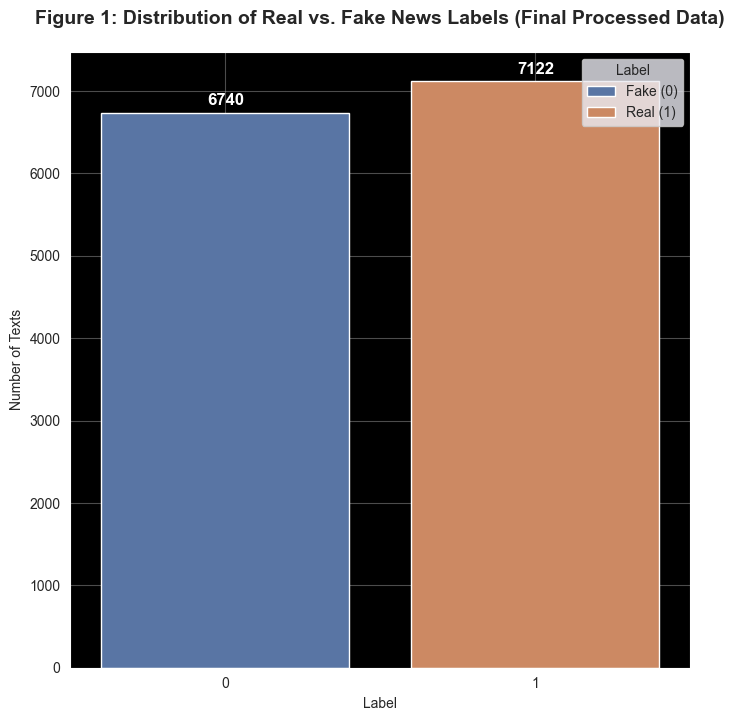

Real News: 48.62%
Fake News: 51.38%


In [153]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(x = 'label', data = df_nlp, palette = 'deep', hue = 'label')
ax.grid(True, alpha = 0.3)
ax.set_facecolor('black')


plt.title('Figure 1: Distribution of Real vs. Fake News Labels (Final Processed Data)', pad = 20, fontsize = 14, weight = 'bold')
plt.xlabel('Label')
plt.ylabel('Number of Texts')


for container in ax.containers:
    ax.bar_label(container, color = 'white', fontsize = 12, fontweight = 'bold', padding = 3)

plt.legend(title = 'Label', labels = ['Fake (0)', 'Real (1)'])

plt.show()


# Showing the exact percentage

counts = df_nlp['label'].value_counts(normalize = True) * 100      
# normalize converts simple counts to relative frequencies by dividing by the total count
# multiplying by 100 converts it to percentages

print(f"Real News: {counts[0]:.2f}%")
print(f"Fake News: {counts[1]:.2f}%")

### Structural Characteristics ( Word Count )

In [156]:
df_nlp['nlp_word_count'] = df_nlp['nlp_text'].apply(lambda x: len(str(x).split()))

# word count reduced after stop-word removal 

In [158]:
df_nlp.head(2)

,text,image_path,entity_id,topic,fine-grained label,label,knowledge_embedding,description,relation,platform,author,date,comment,clean_text,word_count,bias_score,intensity_score,nlp_text,nlp_word_count
0,"CDCs Abortion Surveillance System FAQsNo, stat...",Image/cdc_gov/0.ico,[],Health,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],cdc_gov,None,NaN,NaN,"CDCs Abortion Surveillance System FAQs No, sta...",59,0.400000,0.400000,cdcs abortion surveillance system faqs state a...,42
1,"Abortion Surveillance — United States, 2012Abo...",Image/cdc_gov/1.ico,"[Q8452, Q113297224, Q3817591, Q30, Q61, Q759, ...",Health,0,1,"[-0.11652757, -0.08209974, -0.06088451, -0.033...","[[Q8452, description, intentional ending of a ...","[[[Q8452, P910, Q6156380], [Q8452, P1343, Q302...",cdc_gov,"[Karen Pazol, Andreea A. Creanga, Denise J. Ja...",NaN,NaN,"Abortion Surveillance — United States, 2012Abo...",16339,0.409654,0.046032,abortion surveillance united states 2012aborti...,3170


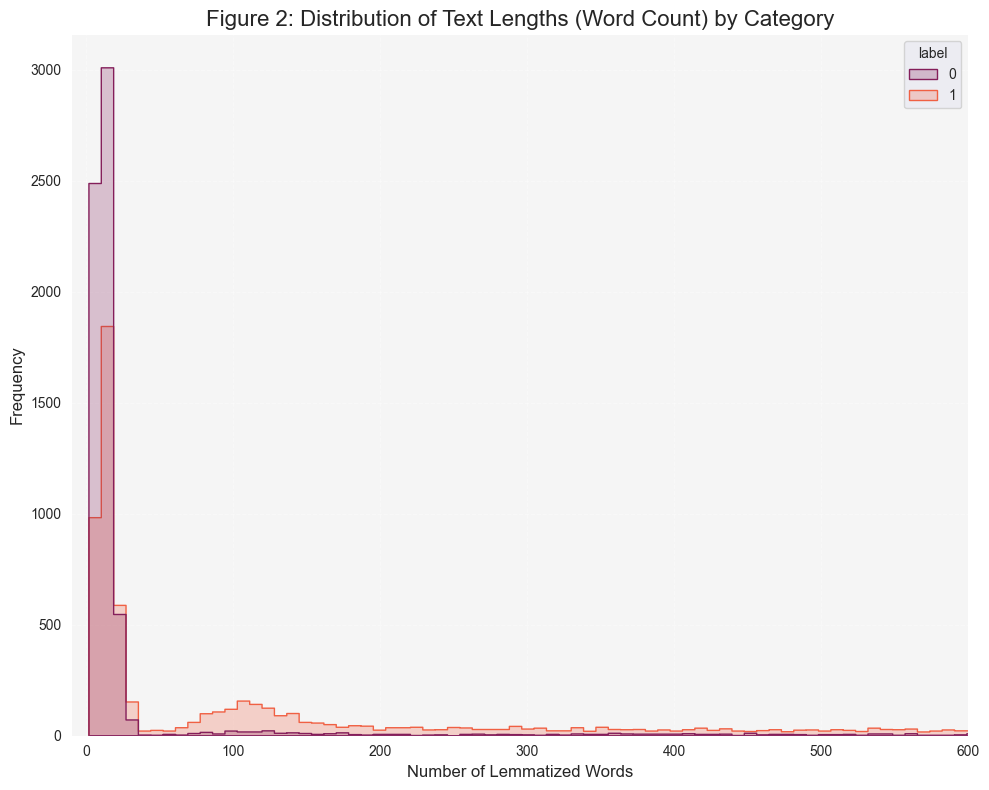

In [159]:
plt.figure(figsize = (10,8))

ax = sns.histplot(data = df_nlp, x = 'nlp_word_count',element = 'step', hue = 'label', palette = 'rocket')

ax.set_xlim(-10, 600)
ax.set_facecolor('whitesmoke')

plt.title('Figure 2: Distribution of Text Lengths (Word Count) by Category', fontsize = 16)
plt.xlabel('Number of Lemmatized Words', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.grid(True, linestyle = '--', alpha = 0.4)

plt.tight_layout()
plt.show()

### Lexical Characteristics ( Bigrams )

This analysis identifies the 15 most common two-word phrases (bigrams) used in fake news and real news articles. By comparing these phrases, I can observe differences in writing style, recurring topics, and commonly used expressions in both fake-labeled text and real-labeled text separately.

**NOTE**

Bigrams are not being used here for any sort predictive purpose. They are used as descriptive N-grams to see which "word sequences" have the highest "likelihood" for each label ( 0/1 ) from the dataset. We are measuring which word pairs (bigrams) have a high probability of occurring together in the "Fake" group versus the "Real" group.

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

def get_most_frquent_bigrams(text_series, n = 15):
    """
    INPUT: the nlp_text series from df_nlp

    METHOD: iterates through every row (or text), identifies unique bigrams in each text, assigne each unique bigram to an index in a sparse matrix, 
    then fills the sparse matrix with frequency of each bigram in each row of data (each piece of text). 
    Every row in sparse matrix = single row from df__nlp, every column in sparse matrix = unique bigram.

    OUTPUT: a list of the top 15 (by frequency) bigrams from the whole nlp_text series
    """

    vectorizer = CountVectorizer(ngram_range = (2,2))
    
    # An empty 'vectorizer' object configured for exactly only 2-word pairs.

    
    sparse_matrix = vectorizer.fit_transform(text_series)
    
    # fit part learns the UNIQUE vocabularies of whole series (vocabularies = bigrams)
    # transform part creates a table (the sparse matrix) and records frequency of each bigram.
    # RESULT: sparse matrix where rows = single text / row from text_series
    # columns = unique bigrams

    
    bigram_counts_matrix = sparse_matrix.sum(axis = 0)
    
    # sum frequencies of every unique bigram from all texts/rows. (top-bottom numbers sum)
    # RESULT: 2D numpy matrix, where single row = totals, and every total matches to a single bigram
    # Rows from the sparse matrix are collapsed in this step, SHAPE: (1, number of bigrams)
    # NOTE: this is a matrix of (1,n), only single row, so NO bigram labels are present anymore


    unique_bigrams_names = vectorizer.get_feature_names_out()
    
    # RESULT: list of all unique bigrams as strings EXACTLY matching order of columns in sparse matrix; index from 0  onwards


    
    bigram_frequency_list = []       # list of tuples (bigram, frequency) pairs
    
    for i in range(len(unique_bigrams_names)):
        bigram_name = unique_bigrams_names[i]
        total_count_current_bigram = bigram_counts_matrix[0, i]
        bigram_frequency_list.append((bigram_name, total_count_current_bigram))

    # Pair each bigram string with its total count

    sorted_bigrams = sorted(bigram_frequency_list, key = lambda x : x[1], reverse = True)
    
    # Sorting the biagrams by frequency in reverse order (highest frequency to lowest frequency)


    return sorted_bigrams[:n]
    # returns first 15 biagrams after sorting

C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\865284360.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_fake, x = 'Frequency', y = 'Bigram', palette = 'Reds_r')
C:\Users\agrim\AppData\Local\Temp\ipykernel_32544\865284360.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_real, x = 'Frequency', y = 'Bigram', palette = 'Blues_r')


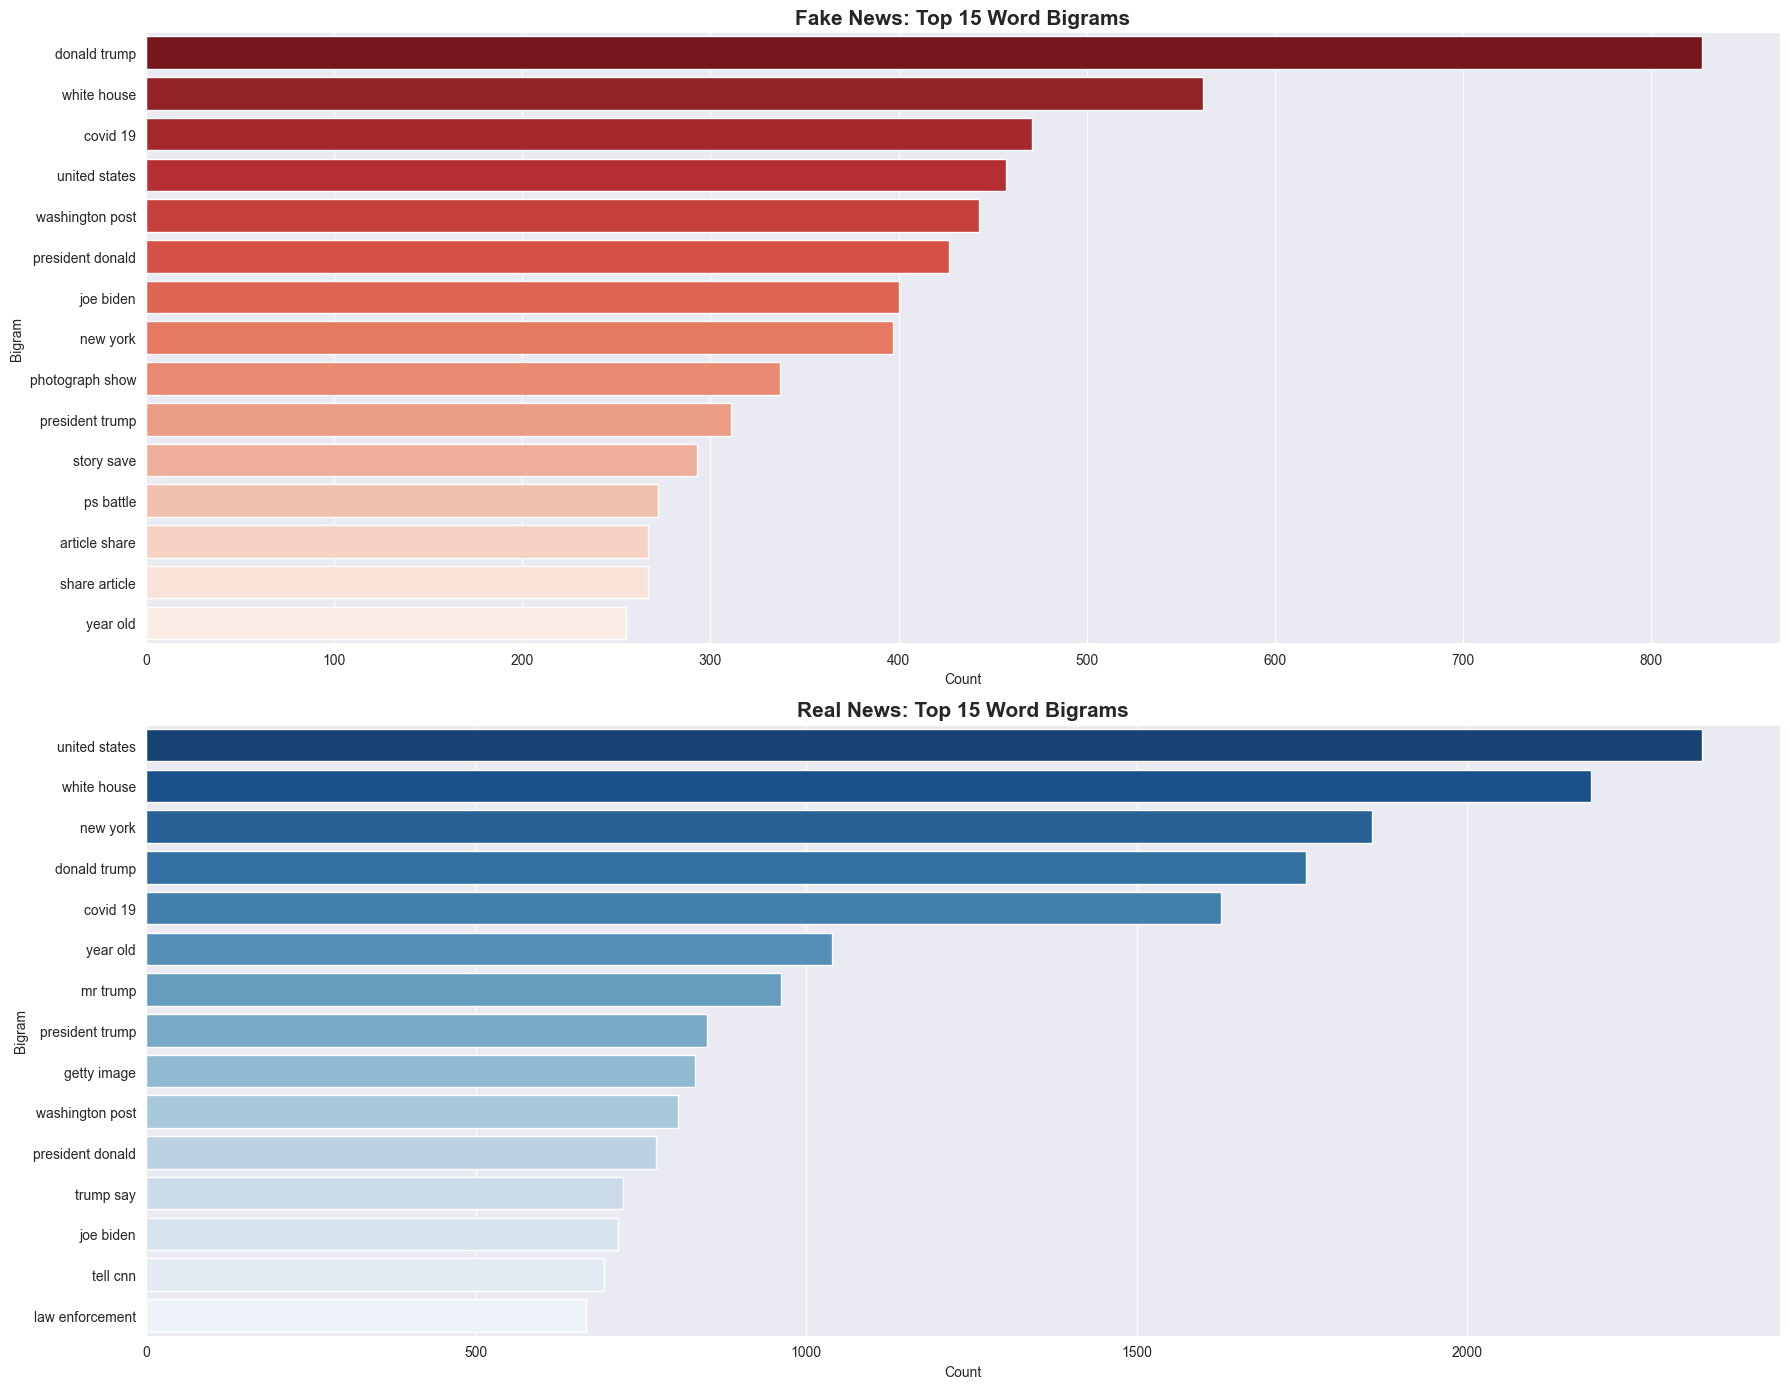

In [166]:
# PLOTTING 


selecting_real = df_nlp[df_nlp['label'] == 1]['nlp_text']
selecting_fake = df_nlp[df_nlp['label'] == 0]['nlp_text']

top_real =  get_most_frquent_bigrams(selecting_real, n=15)
top_fake =  get_most_frquent_bigrams(selecting_fake, n=15)

df_fake = pd.DataFrame(top_fake, columns=['Bigram', 'Frequency'])
df_real = pd.DataFrame(top_real, columns=['Bigram', 'Frequency'])



plt.figure(figsize=(18, 14))

# --- Fake News Plot ---

plt.subplot(2, 1, 1)
sns.barplot(data = df_fake, x = 'Frequency', y = 'Bigram', palette = 'Reds_r')
plt.title("Fake News: Top 15 Word Bigrams", fontsize = 15, fontweight = 'bold')
plt.xlabel("Count")


# --- Real News Plot ---

plt.subplot(2, 1, 2)
sns.barplot(data = df_real, x = 'Frequency', y = 'Bigram', palette = 'Blues_r')
plt.title("Real News: Top 15 Word Bigrams", fontsize = 15, fontweight = 'bold')
plt.xlabel("Count")

plt.tight_layout()
plt.show()

## Train-Test Split and TF-IDF

In [169]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
# split into train and test; ratio - 80:20 respectively

X_train, X_test, Y_train, Y_test = train_test_split( df_nlp['nlp_text'], df_nlp['label'], train_size = 0.8, test_size = 0.2, stratify = df_nlp['label'], random_state = 10)

In [173]:
# We fit only on Train to avoid leakage, then transform both

tfidf = TfidfVectorizer( max_features = 5000, ngram_range = (1,2), stop_words = 'english')

X_train_vec = tfidf.fit_transform(X_train)  # Learns vocabulary + IDF (TF + IDF of train set)
X_test_vec = tfidf.transform(X_test)        # Uses ONLY rules from Train (TF of test set, but IDF of train set)

In [175]:
# view 5 rows 
features = tfidf.get_feature_names_out()
sample = X_train_vec[190:200].toarray() # only small slice
pd.DataFrame(sample, columns = features).head()

,000,000 live,000 people,000 vote,000 woman,000 year,01,05,10,10 000,...,young man,young people,youth,zelensky,zelenskyy,zero,zika,zika virus,zone,zuckerberg
0,0.052025,0.0,0.000000,0.0,0.0,0.00000,0.017302,0.0,0.018886,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.054948,0.0,0.042594,0.0,0.0,0.02579,0.000000,0.0,0.029921,0.023822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# view first 5 rows safely
features = tfidf.get_feature_names_out()
sample = X_train_vec[11050:11055].toarray() # only small slice
pd.DataFrame(sample, columns = features).head()

,000,000 live,000 people,000 vote,000 woman,000 year,01,05,10,10 000,...,young man,young people,youth,zelensky,zelenskyy,zero,zika,zika virus,zone,zuckerberg
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.008841,0.0,0.006853,0.0,0.0,0.0,0.0,0.018107,0.014443,0.007666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
matrix = pd.DataFrame(sample, columns = features)

In [181]:
print(matrix.shape)
print(list(matrix.columns)[:20])   # preview first 20 column names

(5, 5000)
['000', '000 live', '000 people', '000 vote', '000 woman', '000 year', '01', '05', '10', '10 000', '10 million', '10 year', '100', '100 000', '100 million', '10672', '10672 4808', '11', '12', '12 year']


## Model Training and Evaluation

### Model 1: Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr_model = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 10)
lr_model.fit(X_train_vec, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,10
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [187]:
Y_pred_lr = lr_model.predict(X_test_vec)

In [189]:
# 3. Results

print("--- LOGISTIC REGRESSION RESULTS ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_lr))

--- LOGISTIC REGRESSION RESULTS ---
Accuracy: 0.7367

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1348
           1       0.78      0.67      0.72      1425

    accuracy                           0.74      2773
   macro avg       0.74      0.74      0.74      2773
weighted avg       0.74      0.74      0.74      2773



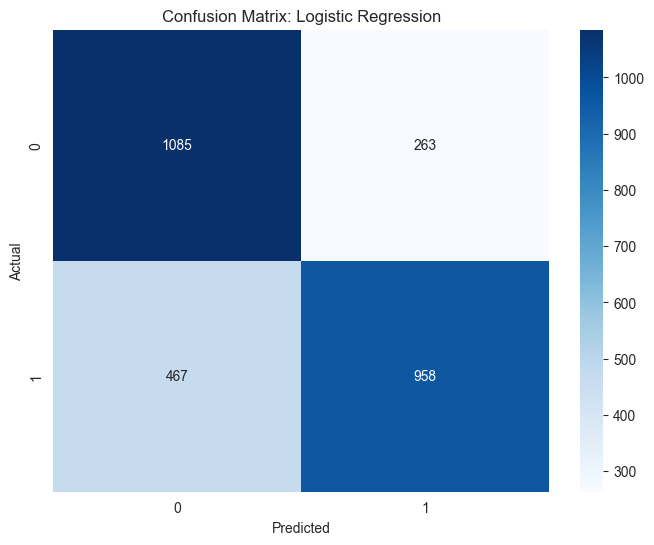

In [191]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred_lr), annot = True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Logistic Regression Version 2 - Optimized Logistic Regression (Tuning C [regularization parameter] )

In [194]:
lr_model_v2 = LogisticRegression(C = 10, class_weight = 'balanced', max_iter = 1000, random_state = 10)
lr_model_v2.fit(X_train_vec, Y_train)

Y_pred_lr_v2 = lr_model_v2.predict(X_test_vec)

In [196]:
print("--- LOGISTIC REGRESSION V2 (WEAK REGULARIZATION) ---")
print(classification_report(Y_test, Y_pred_lr_v2))

--- LOGISTIC REGRESSION V2 (WEAK REGULARIZATION) ---
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1348
           1       0.73      0.68      0.70      1425

    accuracy                           0.70      2773
   macro avg       0.70      0.70      0.70      2773
weighted avg       0.71      0.70      0.70      2773



#### Logistic Regression Version 3 - Optimized Logistic Regression (Tuning C [regularization parameter] )

In [199]:
# Lowering C to 0.1 makes the model more 'stubborn'
# This often helps it ignore the noise of the majority class

lr_model_v3 = LogisticRegression(C = 0.1, class_weight = 'balanced', max_iter = 1000, random_state = 10)
lr_model_v3.fit(X_train_vec, Y_train)

Y_pred_lr_v3 = lr_model_v3.predict(X_test_vec)

In [201]:
print("--- LOGISTIC REGRESSION V3 (STRONG REGULARIZATION) ---")
print(classification_report(Y_test, Y_pred_lr_v3))

--- LOGISTIC REGRESSION V3 (STRONG REGULARIZATION) ---
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1348
           1       0.81      0.62      0.70      1425

    accuracy                           0.73      2773
   macro avg       0.74      0.73      0.73      2773
weighted avg       0.74      0.73      0.72      2773



### Model 2: Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 10, class_weight = 'balanced', random_state = 10)
rfc_model.fit(X_train_vec, Y_train)

Y_pred_rfc = rfc_model.predict(X_test_vec)

In [206]:
# 1. Results

print("--- RANDOM FOREST CLASSIFIER RESULTS ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rfc):.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rfc))

--- RANDOM FOREST CLASSIFIER RESULTS ---
Accuracy: 0.7411

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1348
           1       0.79      0.68      0.73      1425

    accuracy                           0.74      2773
   macro avg       0.75      0.74      0.74      2773
weighted avg       0.75      0.74      0.74      2773



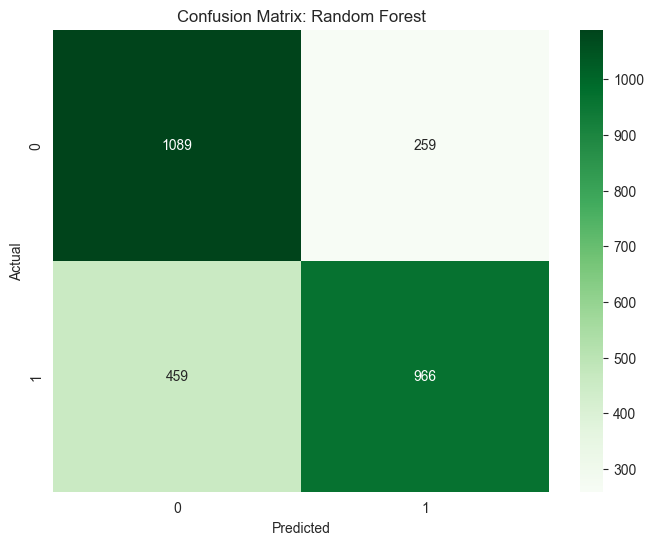

In [208]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred_rfc), annot = True, fmt='d', cmap = 'Greens') # Green for RF to distinguish from LR
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 3: Support Vector Machine (SVM)

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Initialize the SVM
# 'linear' is the standard for text/TF-IDF
# 'balanced' forces it to treat the 92 fake samples with the same respect as the 470 real ones

svm_model = SVC(kernel = 'linear', class_weight = 'balanced', probability = True, random_state = 10)

# 2. Train
svm_model.fit(X_train_vec, Y_train)

# 3. Predict
Y_pred_svm = svm_model.predict(X_test_vec)

In [213]:
# 4. Results

print("--- SVM FINAL RESULTS ---")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_svm):.4f}")
print(classification_report(Y_test, Y_pred_svm))
                                          

--- SVM FINAL RESULTS ---
Accuracy: 0.7295
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1348
           1       0.77      0.67      0.72      1425

    accuracy                           0.73      2773
   macro avg       0.73      0.73      0.73      2773
weighted avg       0.74      0.73      0.73      2773



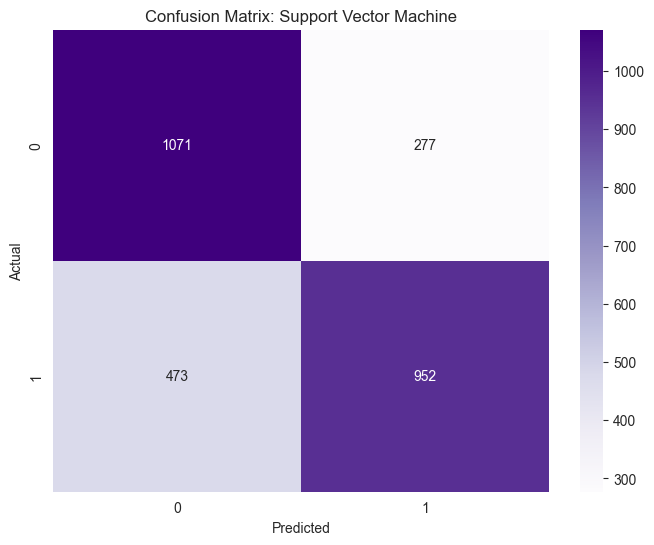

In [215]:
# 5. Confusion Matrix

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred_svm), annot = True, fmt = 'd', cmap = 'Purples')
plt.title('Confusion Matrix: Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<hr>

<hr>

## Final Scores ( Fake-Likelihood, Bias, Reliability, Tone)

-- Baselines Captured using usable_data DF for REAL (1) ---

- Normal Bias Range for REAL NEWS (1):	 0.132 to 0.568
- Normal Intensity Range for REAL NEWS (1):	 -0.030 to 0.240

The 'Fixed Rules' based on the dataset used - FineFake 

the mean and std of bias and intensity for ONLY the REAL-labeled rows


- REAL_BIAS_MEAN = 0.350
- REAL_BIAS_STD = 0.218

- REAL_INTENSITY_MEAN = 0.105
- REAL_INTENSITY_STD = 0.135

In [221]:
REAL_BIAS_MEAN = 0.350
REAL_BIAS_STD = 0.218

REAL_INTENSITY_MEAN = 0.105
REAL_INTENSITY_STD = 0.135

In [223]:
def clean_for_humans(text):
    # At this stage, I want to keep punctuation and capitalization, for the bias and intensity calculations
    # Using the clean_text_for_length function used on the FineFake dataset above
    # Removes HTML, URLs, and Emojis but KEEPS casing and punctuation;
    # Also spaces out two capitalized words with no space (E.G.: AnimalsTerrestrial)
    text_series = pd.Series([text])
    cleaned = clean_text_for_length(text_series)
    return cleaned[0]

def clean_for_vectorization(text):
    # Running the full nlp_pipeline_optimized
    # Lemmatizes and removes stopwords so TF-IDF can read it
    text_series = pd.Series([text])
    nlp_text_list = nlp_pipeline_optimized(text_series)
    return nlp_text_list[0]

In [232]:
def news_analysis_engine(user_input):
    
    # FAKE-LIKELIHOOD SCORE
    
    # STEP 1: Basic cleaning (HTML/URLs) - this version is for tone / bias / LLM
    human_readable_text = clean_for_humans(user_input)
    
    # STEP 2: Deep NLP cleaning- this version is ONLY for the ML Model; the version which will be vectorized using tf-idf
    vectorization_version = clean_for_vectorization(human_readable_text)
    
    # --------------------------------------------------------------------------------------------------------------------------------------------
    # STEP 3: Fake News Likelihood
    vectorized_data = tfidf.transform([vectorization_version])
    prediction_prob = svm_model.predict_proba(vectorized_data)        # Returns a 2D numpy array (n_samples, n_classes)
    fake_likelihood_score = prediction_prob[0][0] * 100              # Selects row 0 (the first sample) and column 0 (probability of class 0 = Fake)
    
    # ----------------------------------------------------------------------------------------------------------------------------------------------
    
    # BIAS SCORE
    
    # STEP 4: Bias Score (Using Human Version)
    blob = TextBlob(human_readable_text)
    current_subjectivity = blob.sentiment.subjectivity
    
    # STEP 5: Calculating the Z-Score (The distance from mean of real news; NOTE: the mean and std from the FineFake REAL (1) news (training + testing) 
    # is used to serve as a benchmark; to keep comparisons fair
    
    bias_diff = current_subjectivity - REAL_BIAS_MEAN        # REAL_BIAS_MEAN = mean of bias of ALL real-labeled texts in filtered dataset
    bias_z_score = bias_diff / REAL_BIAS_STD                 # bias_z_score = how many standard deviations away is text’s subjectivity from real‑news subjectivity.


    
    # STEP 6: Converting the bias_z_score to a percentage (scale 0 - 100)
    
    # NOTE: 1.25 STD away (either in positive or negative direction) is considered to be 50% biased using 40 as the multiplier. 
    # So 2.5 STDs away from the mean is 100% biased.
    # By using a multiplier of 40:
    # 1.0 STD away = 40% Bias Score
    # 2.0 STD away = 80% Bias Score
    # 2.5 STD away = 100% Bias Score (Top 1% of outliers)
    # This is inspired from the empirical rule of standard deviation, which states that roughly 68% of data is WITHIN the range of 1 STD from the mean.
    # So if an article is 1 STD away from the mean here (NOT WITHIN 1 STD, but >= 1 STD), it is moving away from the 'most common' zone, where most data lies.
    # The rule also states that 95% of all data should fall within 2 STDs from the mean.
    # So if a text is exactly 2.5 (or more) STDs away from the mean [I.E., further away than 95% of the texts from the mean], it should get a bias score of 100%.
    # So 1.25 STD = 50% bias score and 2.5 STDs = 100% bias score; this is the conversion method used to convert from Z-score to a bias scale 0-100
    
    
    final_scaled_bias_score = abs(bias_z_score) * 40
    if final_scaled_bias_score > 100:
        final_scaled_bias_score = 100
    # In case score exceeds 100 when converting to a scale of (0-100), consider max always: 100
    # this is the user-display scaled bias score
    

    # -------------------------------------------------------------------------------------------------------------------------------------------------

    # POLARITY
    
    # STEP 7: Getting Polarity (Intensity) - use 'abs' because extreme +/- both show high emotional language
    # Intensity is the strength of the emotion
    current_polarity = blob.sentiment.polarity
    current_intensity = abs(current_polarity)
    
    #  STEP 8: Calculating Intensity Z-Score
    intensity_diff = current_intensity - REAL_INTENSITY_MEAN
    intensity_z_score = intensity_diff / REAL_INTENSITY_STD

    # -----------------------------------------------------------------------------------------------------------------------------------------------------

    
    # AVERAGING BIAS AND POLARITY
    
    # STEP 9: Linguistic Score
    # Creating a combined deviation score (Bias + Intensity)
    # Bias and intensity are both taken into account by taking their average.
    avg_deviation = (max(0, bias_z_score) + max(0, intensity_z_score)) / 2


    # STEP 10: Scaling the deviation to a 0-100 penalty score.
    # a higher multiplier (60) for the internal risk calculation than the display score (40) to be more aggressive against misinformation.
    # 1.0 STD deviation = 60 point penalty (internal)
    # 1.66 STD deviation = 100 point penalty (internal)
    risk = min(100, avg_deviation * 60)
    
    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # STEP 11:
    
    # TONE EXPLANATION
    
    # Both the bias (subjectivity) and Intensity (Polarity) are considerd to categorize a text to a tone.
    # the bias and intensity Z-Scores are used in combination
    # bias z-score tells us how opinionated the text is and intensity z-score tells us how loud / emotional language is
    # compared TO AVERGAE POLARITY OF REAL-LABELED NEWS seen in the FineFake dataset
    
    # Using 0.4 as the threshold; any text more than 0.4 Standard Deviations away from the mean 
    # is flagged as "moving away from neutral" to ensure even subtle bias is caught.

    tone_threshold = 0.4
    abs_bias_z_score = abs(bias_z_score)
    abs_intensity_z_score = abs(intensity_z_score)

    if abs_bias_z_score > tone_threshold and abs_intensity_z_score > tone_threshold:
        tone_label = 'Highly Opinionated and Emotional'

    # 2. High in Bias OR High in Intensity (Catching the specific leans)

    elif abs_bias_z_score > tone_threshold:
        tone_label = 'Subtle Opinions and maybe Persuasive'

    elif abs_intensity_z_score > tone_threshold:
        tone_label = 'Dramatic / Sensationalist news'

    elif abs_bias_z_score <= tone_threshold and abs_intensity_z_score <= tone_threshold:
            # fewer opinions (less biased) + low emotional language (the IDEAL news standard)
        tone_label = 'Neutral / Standard Reporting'

        
    # -------------------------------------------------------------------------------------------------------------------------------------------------------

    # STEP 12:
    
    # RELIABILITY  
    
    # STEP 11:  Reliability 
    # Note: This is actually a content-based reliability score, but it can be used to derive conclusions about the source.
    # That interpretation is left upto the user. 
    # Simple formula: 100 minus weighted penalties. Penalty 'points' are deducted from 100 to get this score.
    # 2 penalties: 
                # 1. fact / bias check using fake likelihood score from ml model             (80% score from ML model)
                # 2. tone / style check using risk which combines bias and intensity         (20% from risk = Bias + Intensity combined)
    # tone check (risk) has lower weightage (20%) because a text can be a bit biased but still be factually true.
    # Bias and fake-likelihood score should not be interpreted together or based off each other.
    # True texts can have some bias, as it depends on the author and their writing-style.
    
    fact_penalty = fake_likelihood_score * 0.80
    risk_penalty = risk * 0.20
    
    final_reliability = 100 - fact_penalty - risk_penalty
    if final_reliability < 0:
        final_reliability = 0                   # To ensure score does NOT drop below 0 ever.
    if final_reliability > 100:
        final_reliability = 100                 # To ensure score does NOT cross 0 ever.
    
    # -------------------------------------------------------------------------------------------------------------------------------------------------------

    # STEP 13:
    
    # TOP-CONTRIBUTING WORDS

    # Get indices all words from array (created during vectorization) that appear in new text uploaded by user
    # Returns a tuple of (nonzero_row_index, nonzero_col_index)
    # Example: That is (array([0, 0, 1, 1, 2]), array([0, 2, 1, 2, 0]))
    # Non-zero is present at (0,0), (0,2)....etc.
    # here, the rows will be indices of texts from each row and columns will be the unique words / bigrams
    # SO rows not needed (first element of returned tuple not needed) 
    # Since you’re only uploading one text at a time for prediction, your vectorized_data has shape (1, n_features).
    # That means there’s only one row (row 0).
    # The first element of the tuple (row_indices) will just be [0, 0, 0, …].
    # The second element (col_indices) is the one that matters: it tells you which words from the vocabulary actually appear in this uploaded text.
    
    nonzero_indices = vectorized_data.nonzero()[1]
    feature_names = tfidf.get_feature_names_out()

    # Get SVM weights (coefficients) of linear
    # one weight assigned to each tfidf feature (each word / bigram chosen by vectorizer)
    # Positive weights = Real indicators, Negative weights = Fake indicators
    # negative represents one class, positive the other (for binary classification)
    weights = svm_model.coef_.toarray().flatten()
    
    scored_words = []
    for index in nonzero_indices:
        word = feature_names[index]
        weight = weights[index]
        scored_words.append((word, weight))
        
    # Sort: Lowest weights (Fake triggers) first, Highest weights (Real markers) last
    scored_words.sort(key= lambda x: x[1])
    
    top_fake_triggers = [w[0] for w in scored_words[:5]]    # lowest numbers (negative) imply fake label
    top_real_indicators = [w[0] for w in scored_words[-5:]]    # higher numbers (positive) imply real label
    # Selects first element of tuple (the word itself) for first 5 (most negative weights)
    # Selcts first element of tuple (word itself) for last 5 tuples (ones with most positive weights)

    # Use SVM weights, because it helps us see which words pushed the decision towards fake or real (in this case, the probability) the most

    return fake_likelihood_score, final_scaled_bias_score, final_reliability, tone_label, top_fake_triggers, top_real_indicators


## Testing

In [234]:
# --- THE TEST ---

# 6 test articles with different writing styles / topics
# first 2 are real, legitimate news articles taken from trusted sources
# 3rd and 4th are fake news related to medical and a conspiracy theory respectively
# 5th and 6th are fake satire-news taken from the onion.
# Satire-news is fake news written mimicking real news.
# This is the hardest style for detection as it often seems real.

test_articles = {
    "Real_CDC": """Data representing less than 5% of the population have a hatching pattern on the map, which is a note of caution that the wastewater viral activity level shown may not be representative of the state or territory. States or territories without sufficient data are indicated as 'No data'. This can be due to no data reported from the state or territory, or all sites not having the minimum weeks of data available to calculate the wastewater viral activity level. 
    Data Limitations for Influenza A: Wastewater data cannot determine the source of influenza A viruses. Detections could come from a human or from an animal (like a bird) or an animal product (like milk from an infected cow). 
    Wastewater testing for influenza displayed in these visuals only detects influenza A viruses and does not distinguish between influenza A subtypes (e.g. seasonal influenza A(H1N1) virus, seasonal influenza A(H3N2) virus and avian influenza A(H5) virus).
    Data Limitations for RSV: Wastewater data will not include waste that may be disposed of outside the wastewater system, such as from people wearing diapers.""",

    "Real_Reuters": """Russia released video on Tuesday of what it said was the deployment of its nuclear-capable hypersonic Oreshnik missile system in close ally Belarus, a move meant to boost Moscow's ability to strike targets across Europe in the event of a war.
    The state news agency TASS said it was the first time that the Defence Ministry had shown off the Oreshnik mobile missile systems, which President Vladimir Putin has declared are impossible to intercept because of missile speeds reportedly more than 10 times the speed of sound.
    The deployment, and Moscow's announcement that the missiles have entered active service in a country that borders Ukraine and NATO members Poland, Lithuania and Latvia, comes at a time of heightened East-West tensions over Russia's war in Ukraine.""",

   'Fake_Political' : """BREAKING: US Military at the White House Arresting Congress
 Special Operations (SOF) units including 4,000 deputized National Guard soldiers acting as US Marshalls, have served indictments on, or were about to arrest 67% of Congress. Early Mon. morning 25 Jan. 
between 3 and 6 am Military vans, buses and police cars, along with a multitude of police and Military troops, were very busy at a blacked out White House.
“I just watched everyone in the White House arrested” declared an unnamed person doing one of the two videos shown below. 
Even though the Mass Media have refused to report it, the US has been functioning under Martial Law since Sat. 9 Jan. An Interim Military US Government was actually running the US and they saw President Biden as a treasonous agent. A few days before Joe Biden’s Inauguration and due to foreign interference in the 2020 Presidential Election, Trump had instigated the Insurgency Act, declared Martial Law and deferred his power to the US Military.
Early Mon. morning 25 Jan. between 3 and 6 am a blackout occurred in Washington DC around the White House. According to two separate videos taped at the scene, police and US troops were everywhere in the darkness. Military vans, buses and police cars pulled up to the White House, loaded passengers, took them down the road and across a bridge and then some vans came back empty to do a repeat.
Mustang Medic’s recording showed many buses and vans, some marked as Military, entering the Capitol grounds. Several people were taped getting out of their cars, showing IDs to guards and then walking into the grounds.
When it was over and seemingly on Q, fireworks lit up the sky. Reports from those on the ground claimed that by later that day the White House was closed up tight and remained so as of right now.
Evidently Biden’s team was not in the White House, but detained and arrested behind the scenes. The US Military was expected to have arrested Harris on charges of treason, while invoking the 25th Amendment on Biden because of his dementia and subsequent inability to hold office. (The Deep State had plans to invoke the 25th on Biden, put Harris in his place and Pelosi as VP. Not going to happen).""",

    "Fake_Conspiracy": """Actress Mia Farrow Floats Conspiracy Trump Will ‘Start a War’ to Secure a Third Term. Scared yet? Mia Farrow thinks you should be. The actress announced Sunday she believes in a conspiracy theory that dictates President Donald Trump and his “toadies” will “start a war” to secure a third term in office.
    She told her followers on social media that, “People find comfort in the belief that Trump & his motley band of toadies will be gone in 4 years. But I fear he wont leave. I fear he will try to change the Constitution- or ignore it- or start a war maybe w China in the belief that wartime will grant him a third term. Farrow provided no direct evidence to support her claim, she simply offered her observation as a warning to the world.
    This is not the first time the Rosemary’s Baby actress has waded into politics of late.
    Soon after Trump was elected she didn’t hold back her contempt, writing: “A convicted felon who assaulted women, did all he could to overthrow our 2020 elections, lied that he had won, stole our counties nuclear secrets, lied about that & showed them to foreign billionaires. Nothing to celebrate. Its sickening.”""",

    "Satire_Onion_one": """It's that time of year again, when astrophysicist Neil DeGrasse Tyson renews his annual tradition of going down people's chimneys to tell their kids that Santa isn't real.
    According to various reports from around the world, the famously atheist author and celebrity scientist was once again on a mission this year to reach as many children as he could by clambering down their chimneys to remind them not to believe in Santa Claus.
    "Santa is a mythological sociological construct of a prescientific society," Tyson told a crying, startled family. "All the presents around the bottom of your tree actually come from your parents, who probably bought them at Kohl's. Santa Claus is just a figment of an insufficiently advanced culture's imagination, which was conjured to satisfy the social need to explain the giving of gifts. Happy holidays, kids."
    Eyewitnesses said that Tyson then laid a finger to the side of his nose, gave a nod, and casually walked out the family's front door.
    "He seemed to take some type of sick pleasure in making people unhappy," one witness said. "You could tell in his voice that shattering the joys of regular people is something he's very passionate about. I think he also took the milk and cookies."
    At publishing time, Tyson had last been seen dressed up in a red suit and hat at shopping malls around the U.S. promising kids that they'd get the presents they wanted for Christmas as long as they were good and remembered that the only things that truly exist are different types of matter and their totally random interactions.""",

    "Synthetic_Fake_content": """It is now undeniably obvious that the so-called Covid-19 "pandemic" was a total fraudulent sham designed by the corporate media and billionaire philanthropists to spearhead a global fear campaign. While the official WHO "estimates" claimed a worldwide emergency, the actual numbers were abysmally low and ridiculously pathetic. 
    This was a highly organized, malicious testing apparatus established by the Gates Foundation to sustain a terrifying illusion of disease. The "customized" and fundamentally flawed PCR tests were a disgraceful weapon used to generate millions of erroneous cases, justifying the brutal lockdown and the suspension of our basic human rights. 
    This was never about saving lives; it was a cold-blooded pretext to save the global elite's interests while destroying the labor force and our children's futures.""",

         "Fake_Medical": """New research shows just how powerful the phytochemicals in green tea are turning out to be: they are now known to prevent breast cancer, pancreatic cancer, colon cancer, lung cancer and other forms of cancer.
    In fact, if green tea were a prescription drug, it would be called a "miracle cancer cure" drug, no doubt. (And it would be sold for $200 a pill, if not more.) But it's not a drug, and it's available to you right now for mere pennies. Green tea is simply one of the most powerful medicinal herbs known. It is especially useful for preventing cancer, and the research keeps on coming.
    Every person suffering from cancer (or at risk of being diagnosed with cancer) should be taking green tea nutritional supplements. It has zero negative side effects, and yet delivers powerful anti-cancer""" 
}

In [236]:
print("-- START --\n")

for name, content in test_articles.items():
    fake_likelihood, bias_score, reliability, tone_label, top_fake_triggers, top_real_indicators = news_analysis_engine(content)

    print(f"ARTICLE: {name}\n")
    print(f"  - Fake Likelihood: {fake_likelihood:.2f}%")
    print(f"  - Bias Score:      {bias_score:.2f}/100")
    print(f"  - Reliability:     {reliability:.2f}%")
    print(f"  - Tone Category:   {tone_label}\n")
    
    # The Indicators
    print(f"  - Fake Triggers:   {top_fake_triggers}")
    print(f"  - Real Indicators: {top_real_indicators}\n")

print("-- END --")

-- START --

ARTICLE: Real_CDC

  - Fake Likelihood: 19.15%
  - Bias Score:      10.02/100
  - Reliability:     84.68%
  - Tone Category:   Dramatic / Sensationalist news

  - Fake Triggers:   ['pattern', 'activity', 'indicate', 'level', 'milk']
  - Real Indicators: ['site', 'week', 'datum', 'include', 'note']

ARTICLE: Real_Reuters

  - Fake Likelihood: 36.71%
  - Bias Score:      39.76/100
  - Reliability:     64.67%
  - Tone Category:   Subtle Opinions and maybe Persuasive

  - Fake Triggers:   ['sound', 'boost', 'impossible', 'video', 'target']
  - Real Indicators: ['war', 'europe', 'say', 'east', 'poland']

ARTICLE: Fake_Political

  - Fake Likelihood: 45.22%
  - Bias Score:      30.70/100
  - Reliability:     63.83%
  - Tone Category:   Highly Opinionated and Emotional

  - Fake Triggers:   ['repeat', 'run president', 'mass', 'pull', 'video']
  - Real Indicators: ['congress', 'hold', 'national', 'accord', 'include']

ARTICLE: Fake_Conspiracy

  - Fake Likelihood: 57.34%
  - Bias 

**The Support Vector Machine (SVM) was selected as the final model because it demonstrated the strongest performance in real-world "stress tests," specifically flagging Fake Medical and Fake Conspiracy content at 71.14% and 57.34% respectively.** 

While **LRv3** (logistic regression version 3 = lr_model_v3) had a higher theoretical recall of 0.84 based on results of train_test_split data, the SVM proved more effective at identifying fake articles during testing. However, it struggles a bit with certain fake health-related texts and satire_texts written in a way to mimick the writing style of real-news.

## Saving model and functions as Pickle File

In [238]:
import pickle

In [ ]:
VeraCity_bundle = {
    'vectorizer' : tfidf,
    'model' : svm_model,
    'logistic_regression_v1' : lr_model,
    'logistic_regression_v2' : lr_model_v2,
    'logistic_regression_v3' : lr_model_v3,
    'random_forest_classifier' : rfc_model,
    'REAL_BIAS_MEAN' : REAL_BIAS_MEAN,
    'REAL_BIAS_STD' :  REAL_BIAS_STD,
    'REAL_INTENSITY_MEAN' : REAL_INTENSITY_MEAN,
    'REAL_INTENSITY_STD' : REAL_INTENSITY_STD,
}

with open('VeraCity_model.pkl', 'wb') as file:
    pickle.dump(VeraCity_bundle, file,  protocol = pickle.HIGHEST_PROTOCOL)

--- Baselines Captured using usable_data DF for REAL (1) ---

Bias: Mean = 0.350,	 Std = 0.218
Intensity: Mean = 0.105,	 Std = 0.135

Normal Bias Range for REAL NEWS (1):	 0.132 to 0.568
Normal Intensity Range for REAL NEWS (1):	 -0.030 to 0.240

<hr>

<hr>

<hr>